In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

Graphs plotted as: Normal values, normalized values, standardized values
minute_aggregated/spam_background-0.1s.featureset.csv
avg_duration


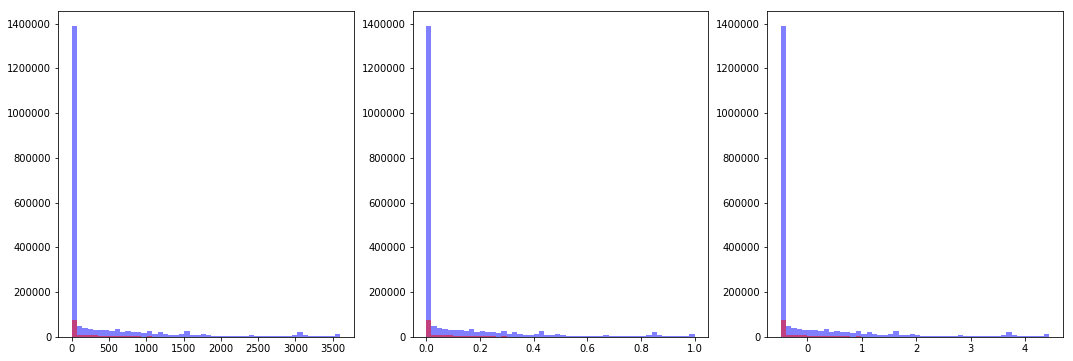

std_packets


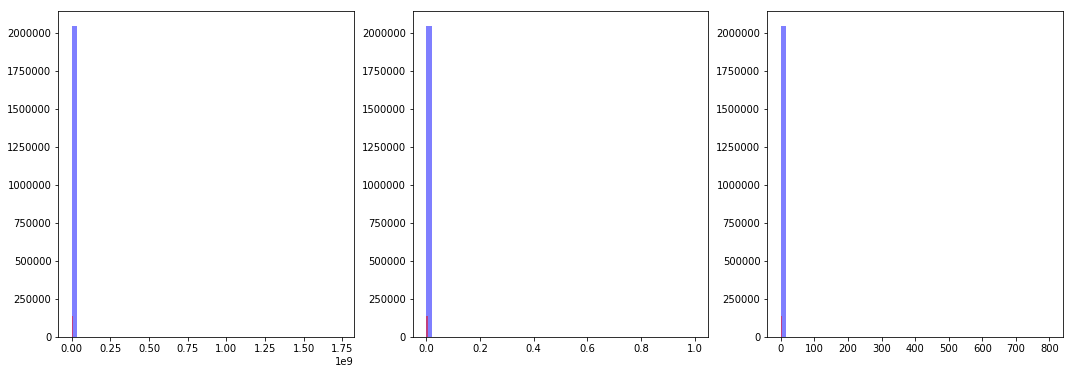

std_srcbytes


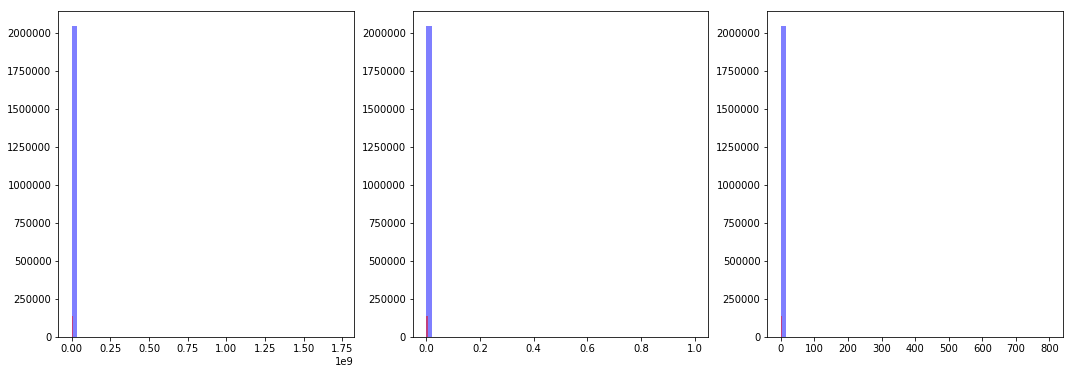

std_time


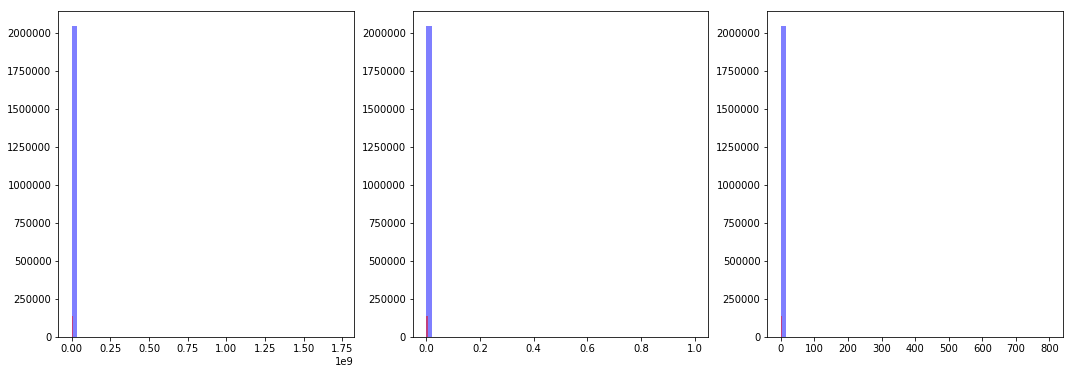

std_bytes


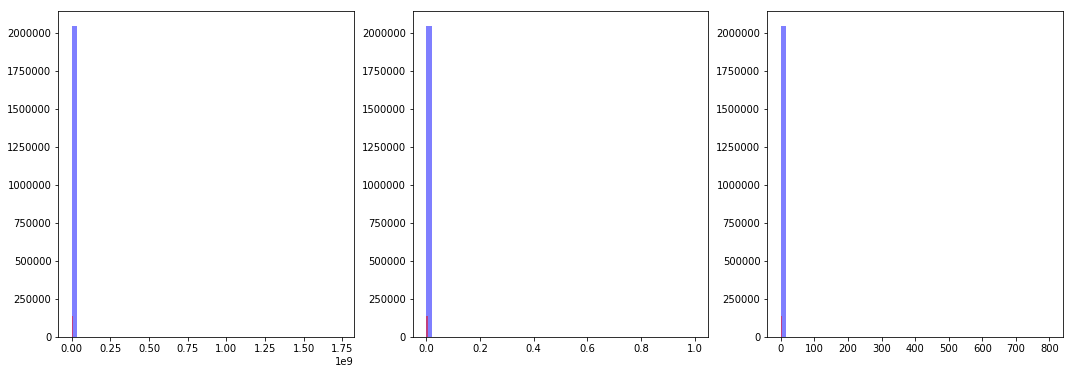

entropy_srcport


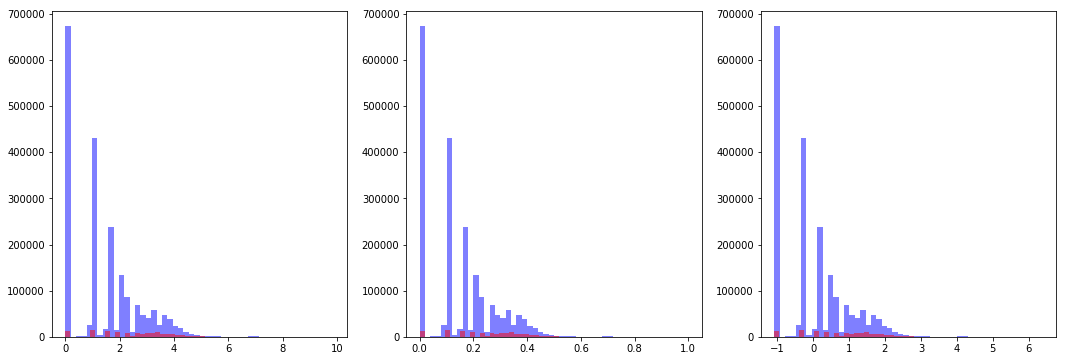

entropy_dst_na_ip


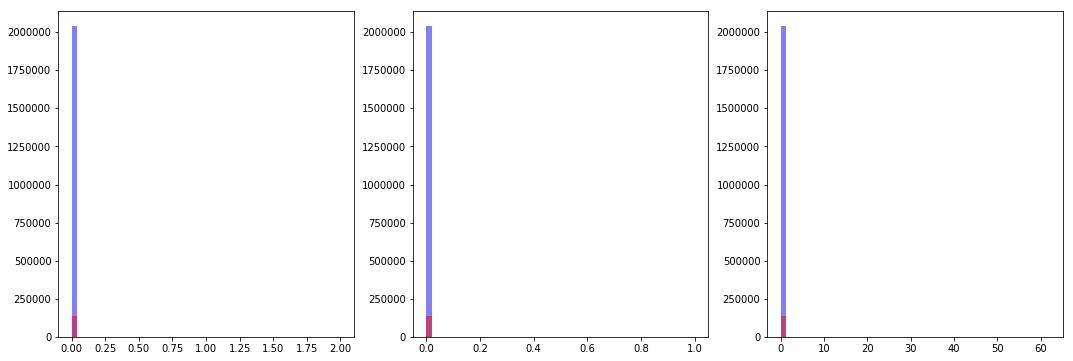

entropy_dstip


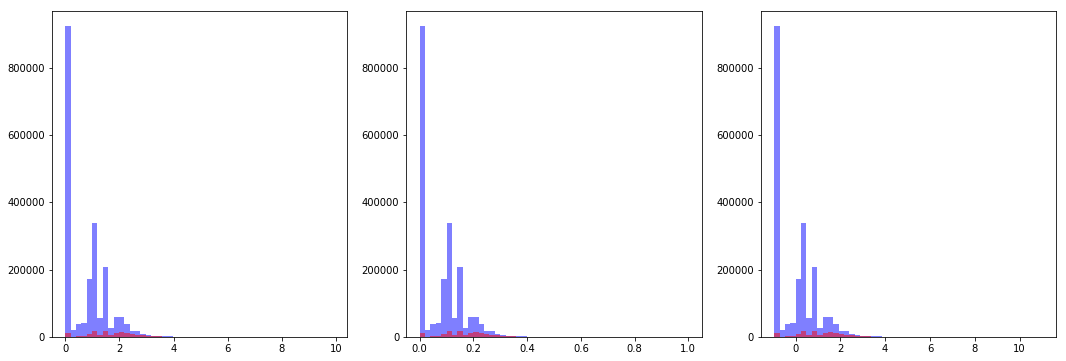

entropy_dstport


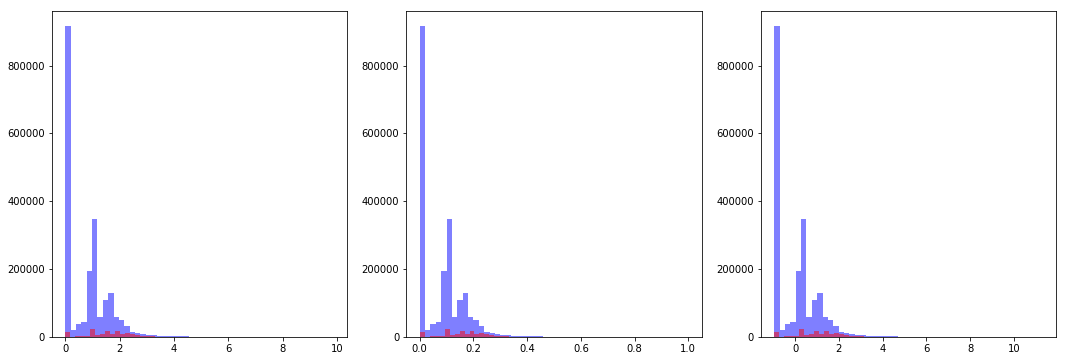

entropy_dst_b_ip


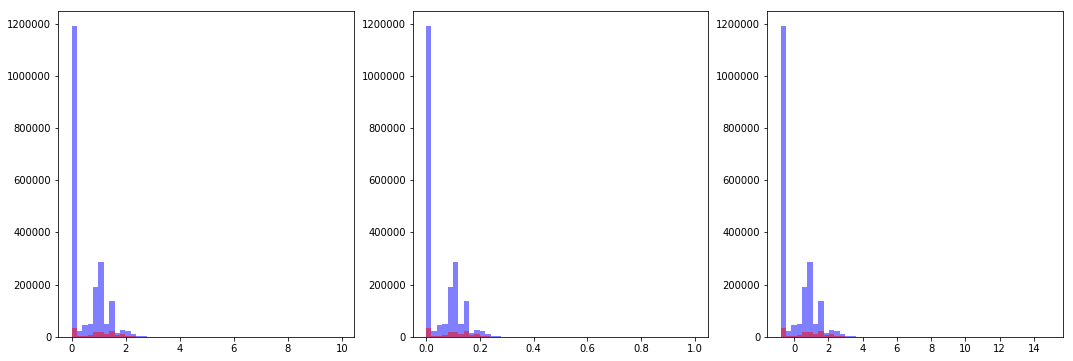

entropy_src_bytes


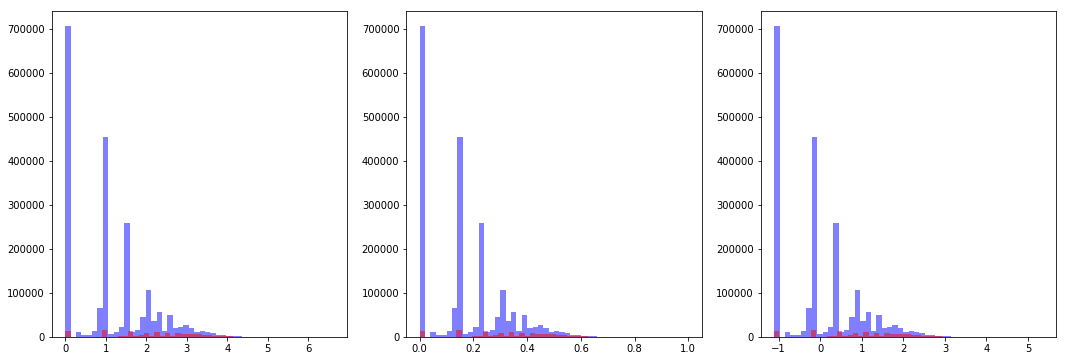

entropy_dst_c_ip


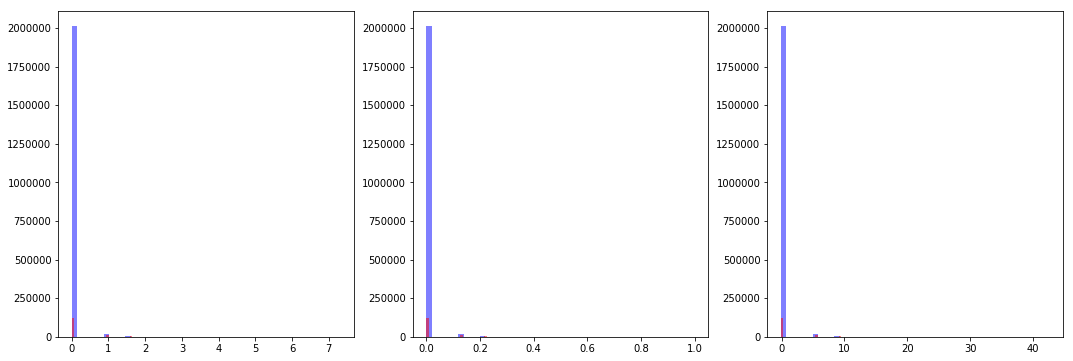

entropy_dports>1024


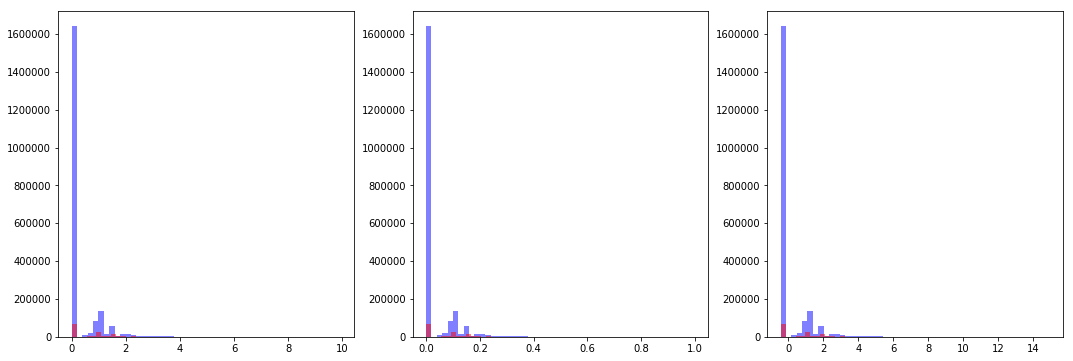

entropy_src_a_ip


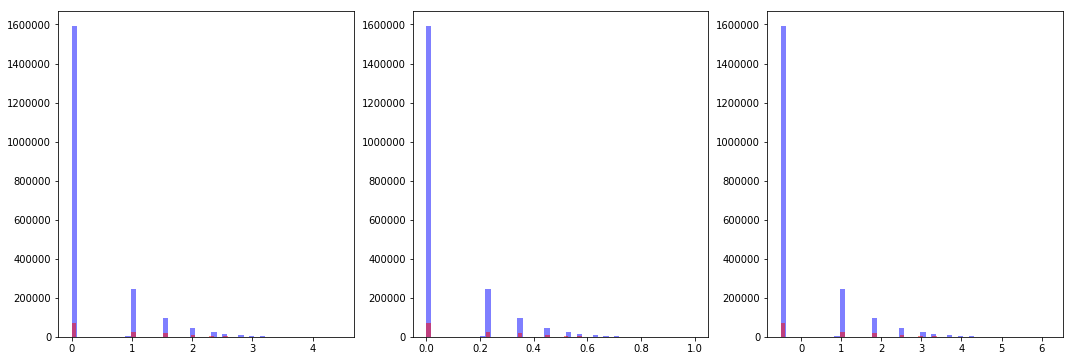

entropy_src_c_ip


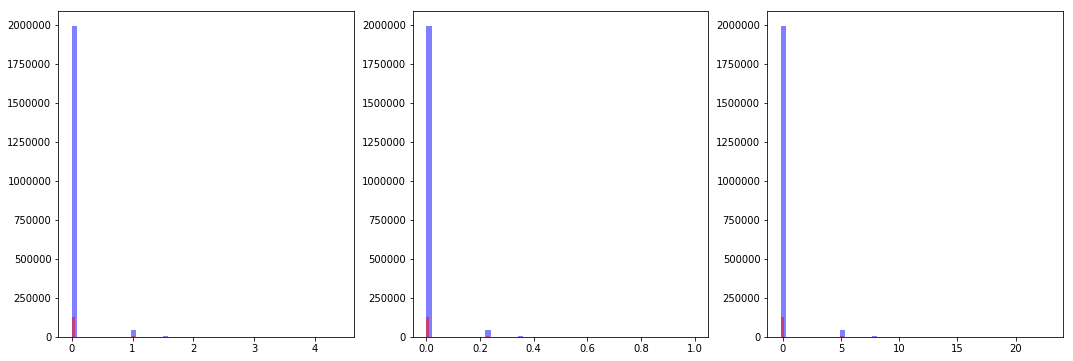

entropy_state


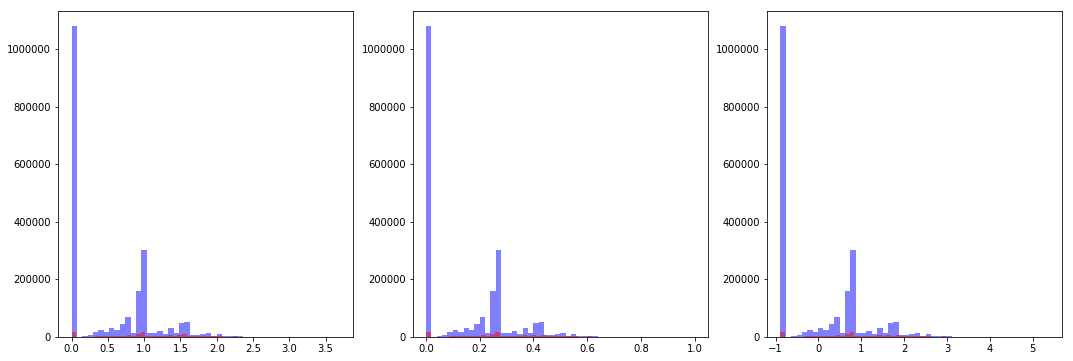

entropy_src_na_ip


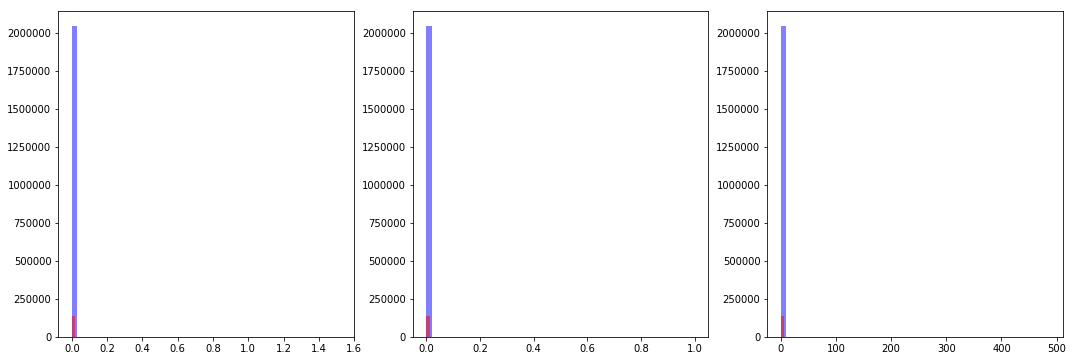

entropy_packets


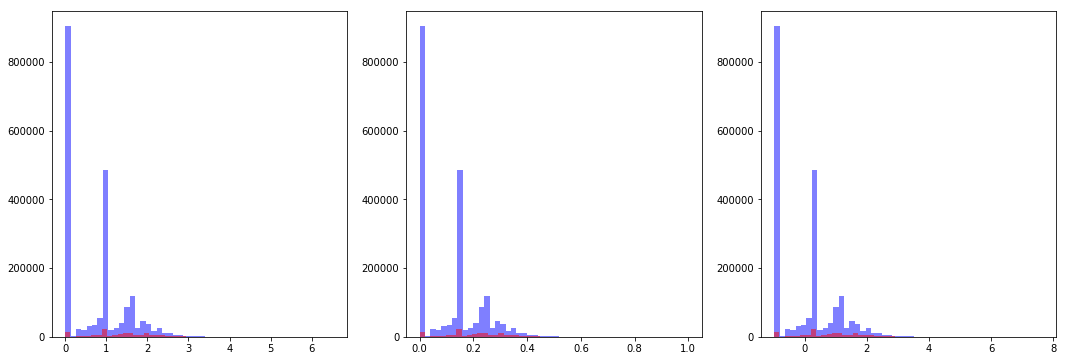

entropy_bytes


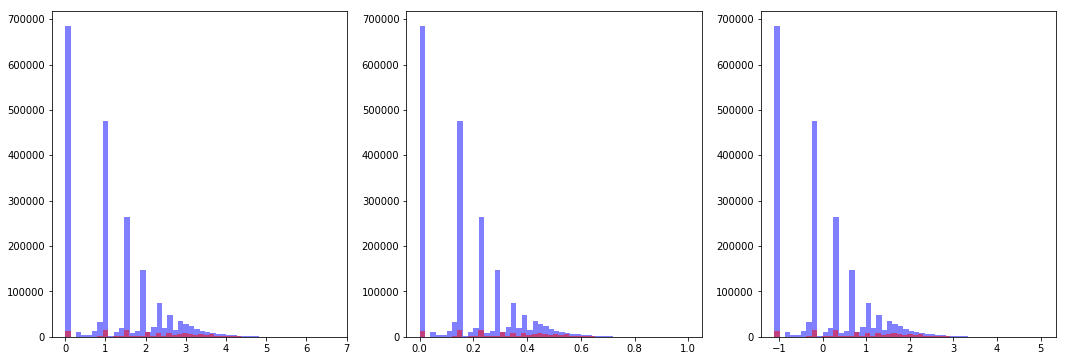

entropy_dst_a_ip


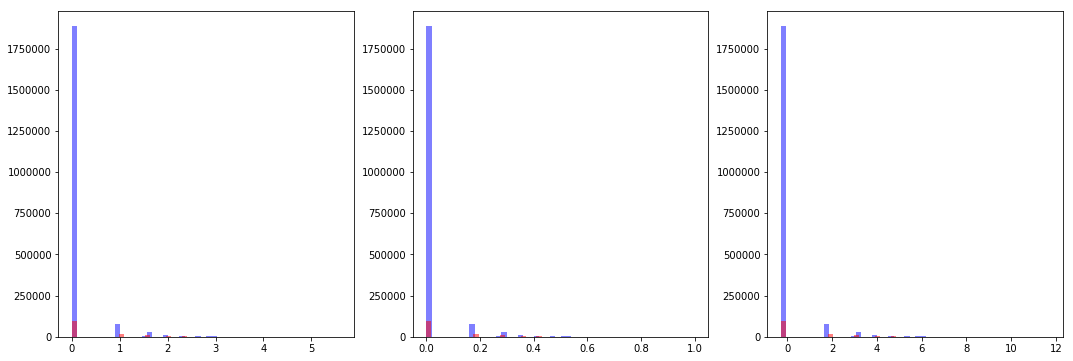

entropy_time


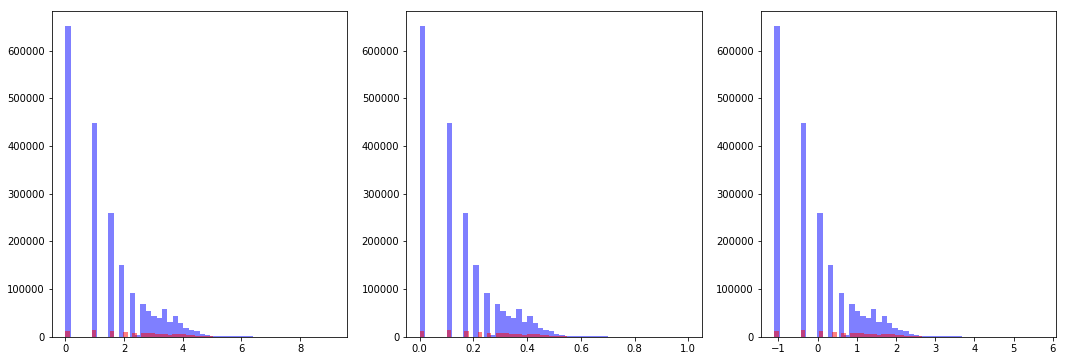

entropy_dports<1024


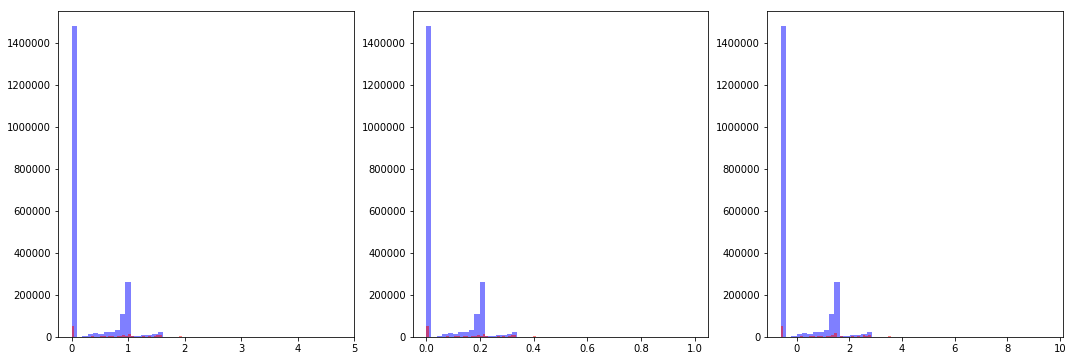

entropy_sports<1024


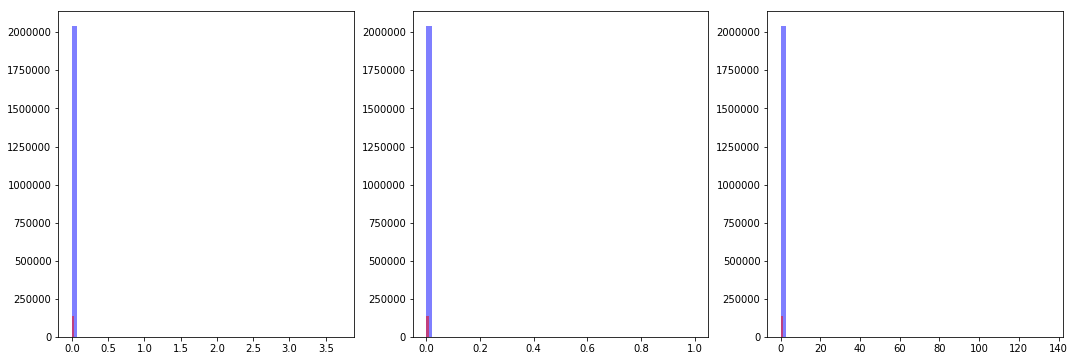

entropy_src_b_ip


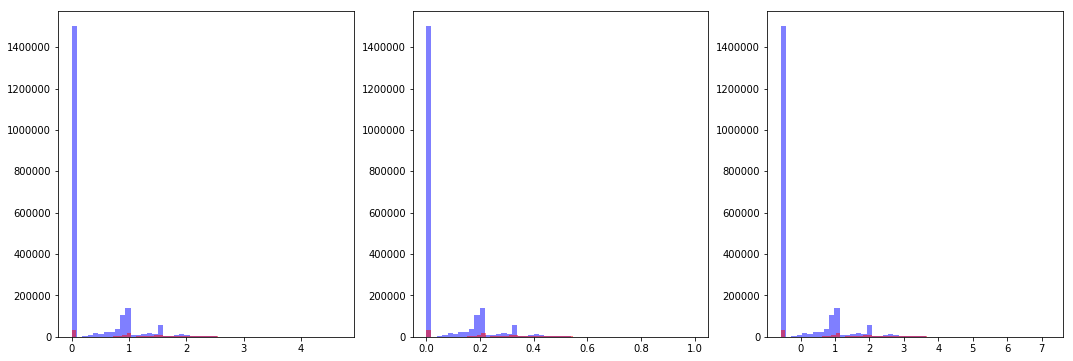

entropy_srcip


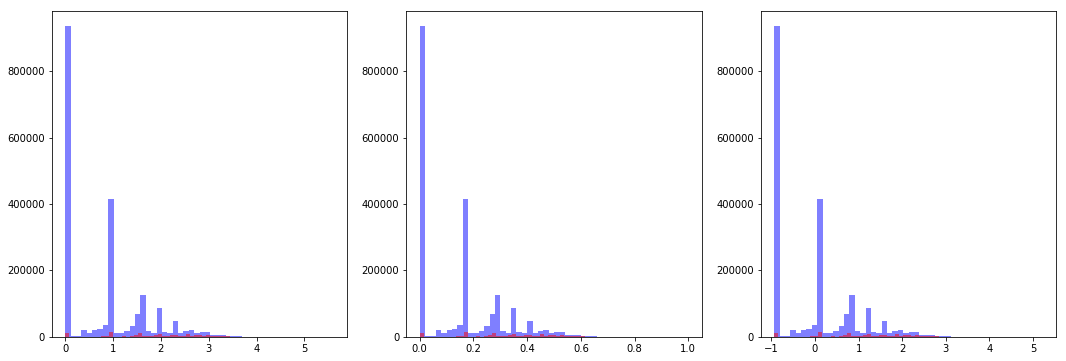

entropy_sports>1024


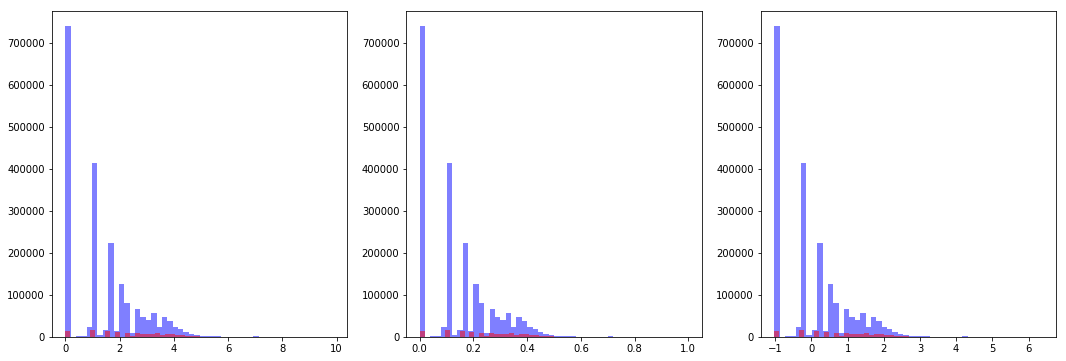

minute_aggregated/ddos_background-0.1s.featureset.csv
avg_duration


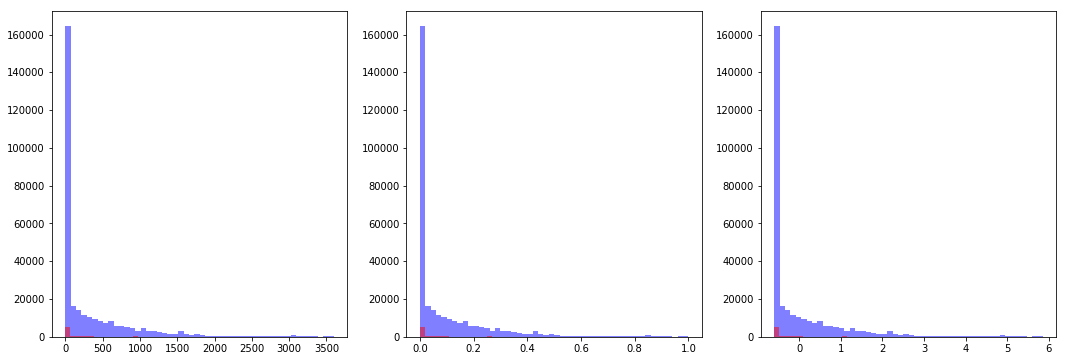

std_packets


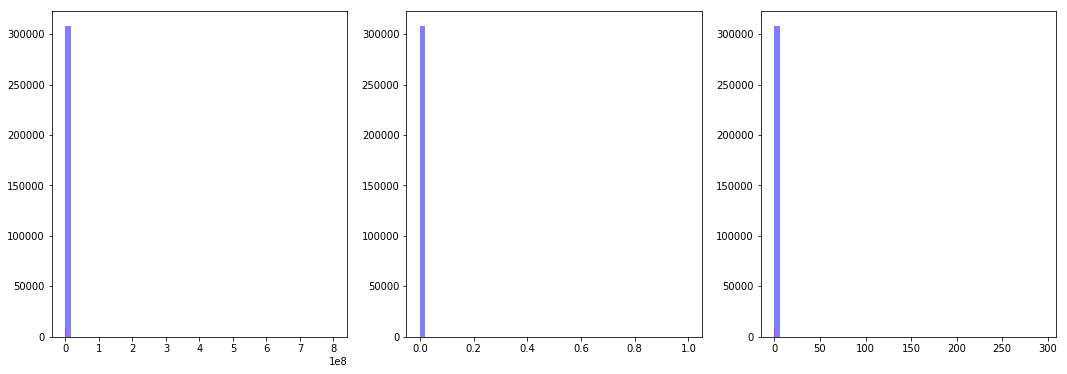

std_srcbytes


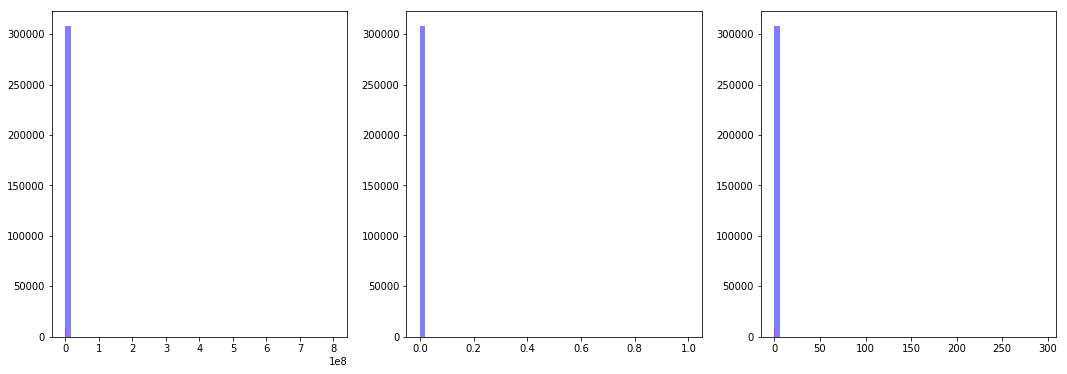

std_time


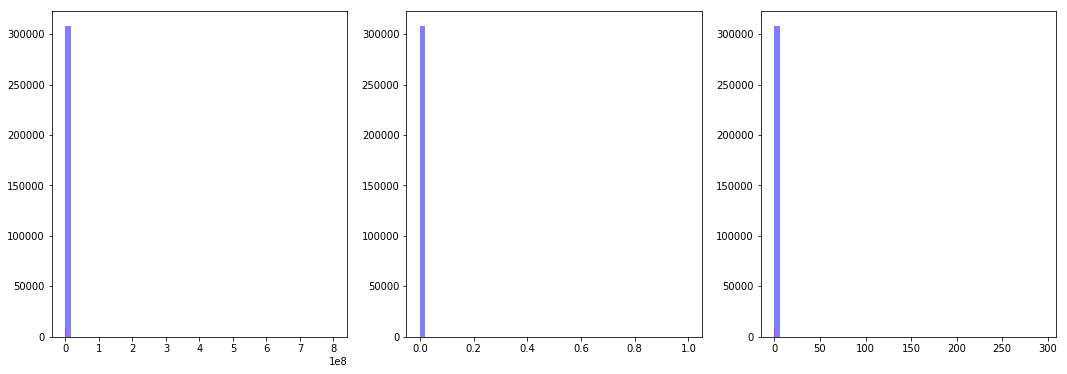

std_bytes


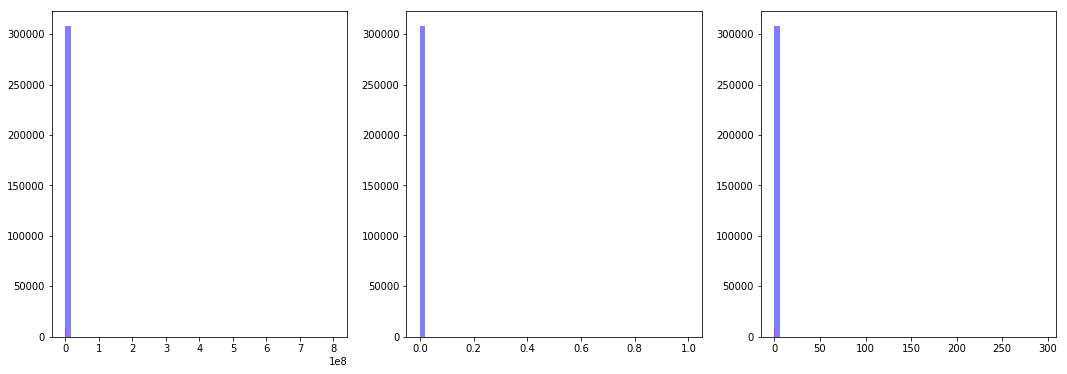

entropy_srcport


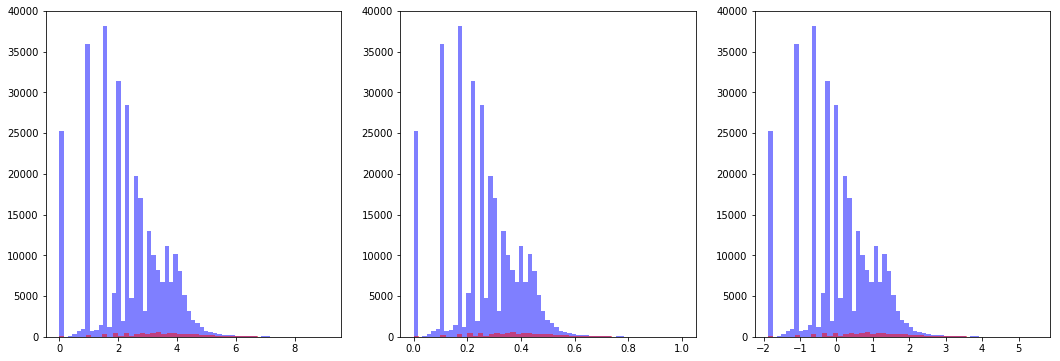

entropy_dst_na_ip


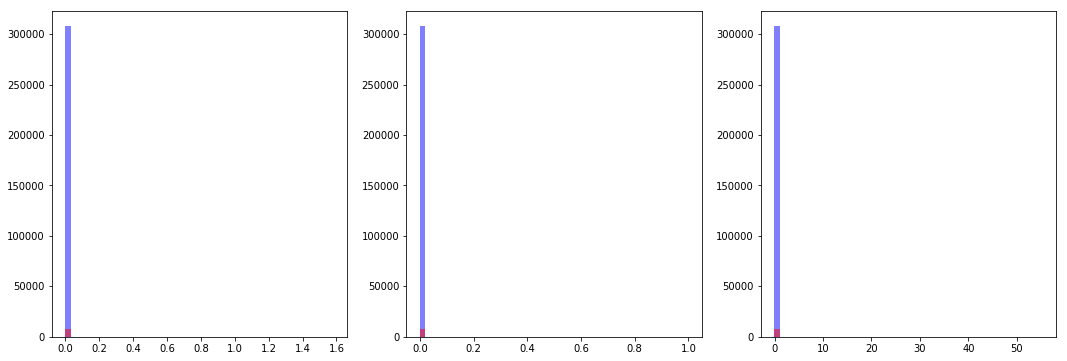

entropy_dstip


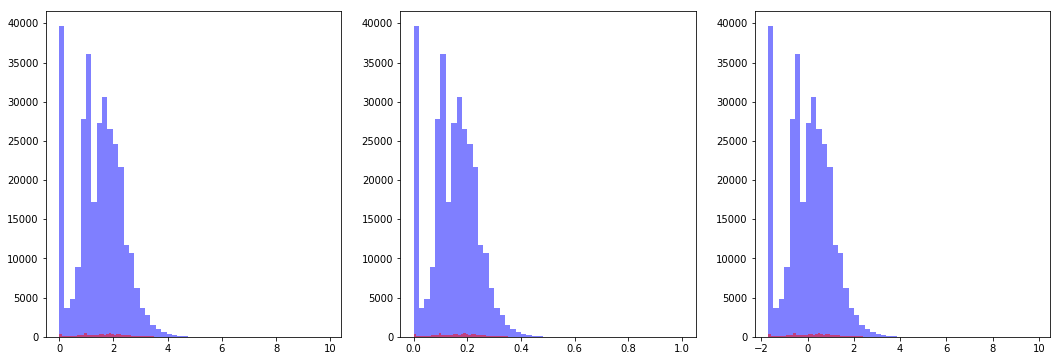

entropy_dstport


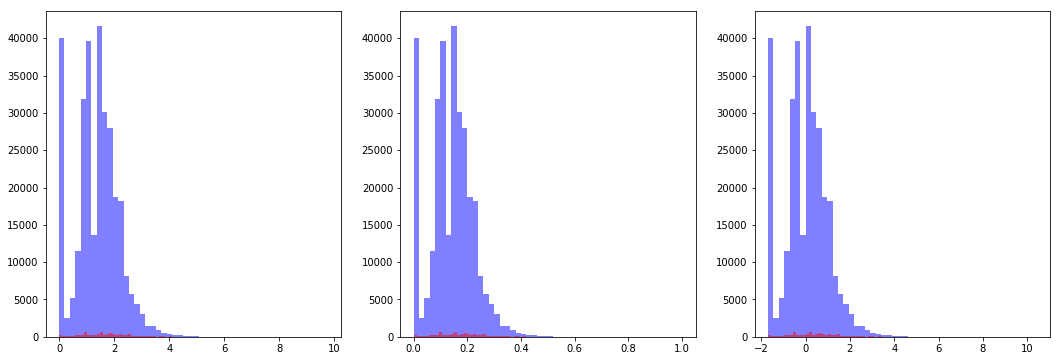

entropy_dst_b_ip


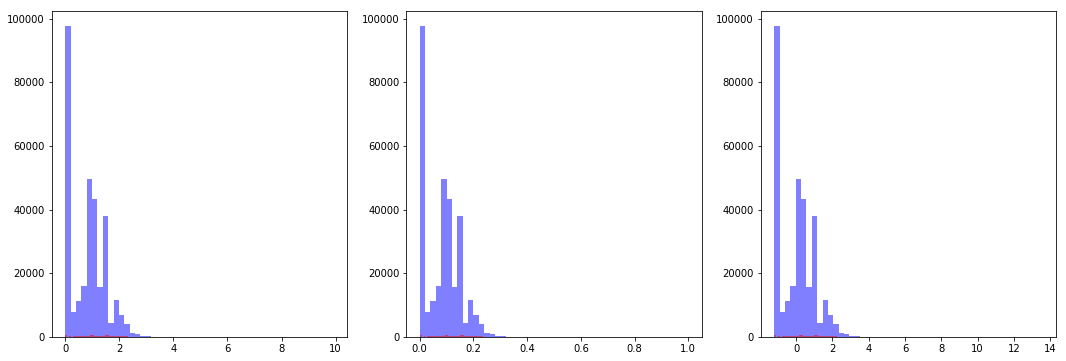

entropy_src_bytes


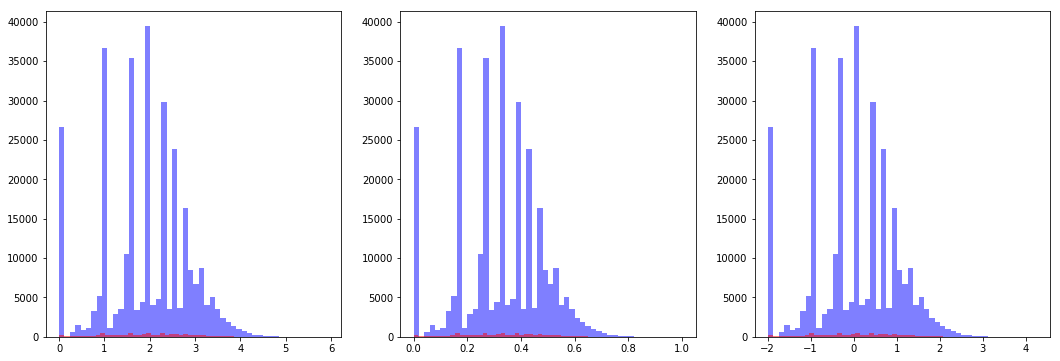

entropy_dst_c_ip


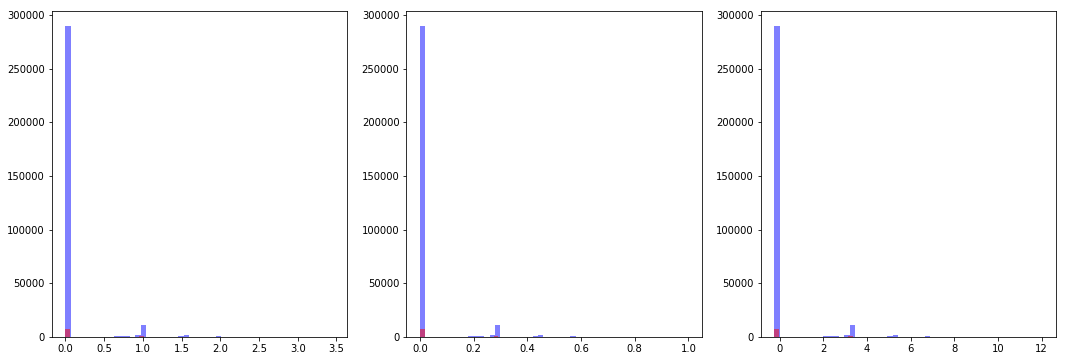

entropy_dports>1024


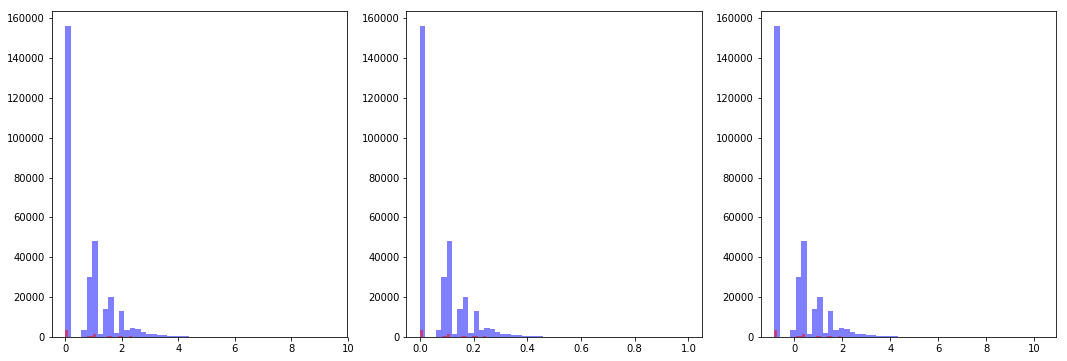

entropy_src_a_ip


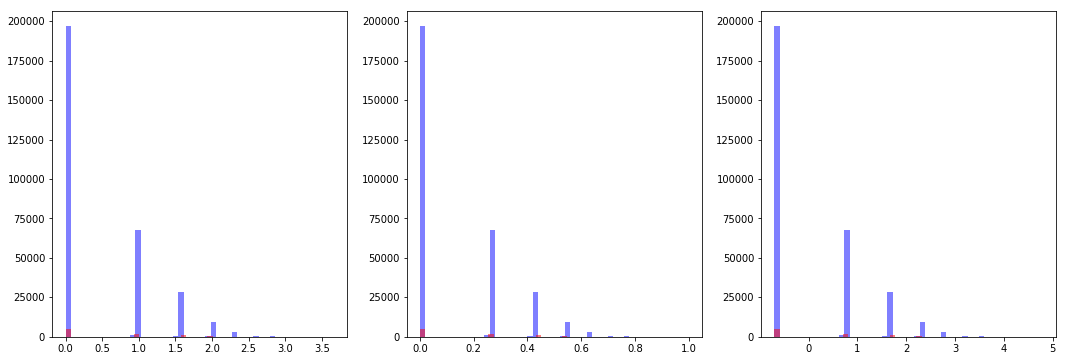

entropy_src_c_ip


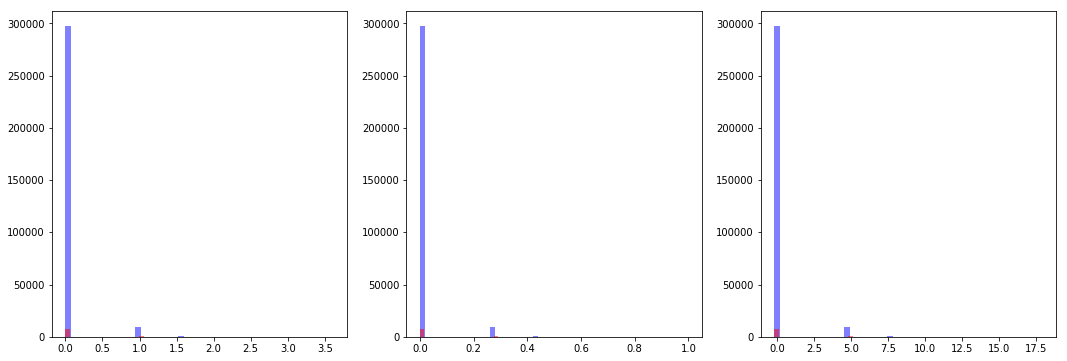

entropy_state


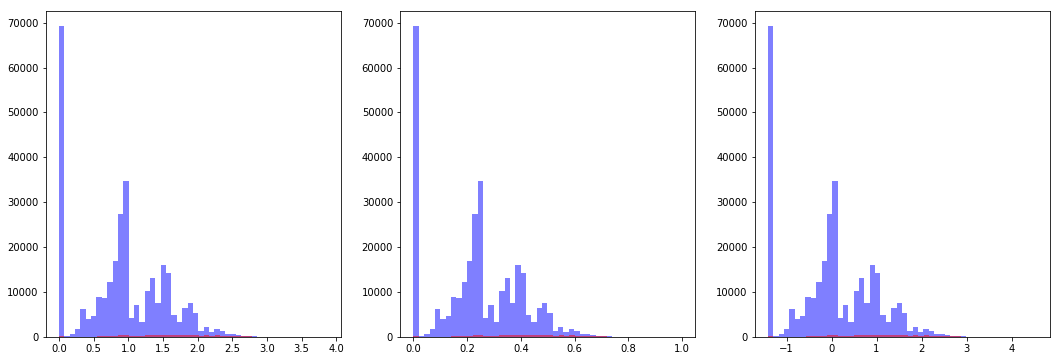

entropy_src_na_ip


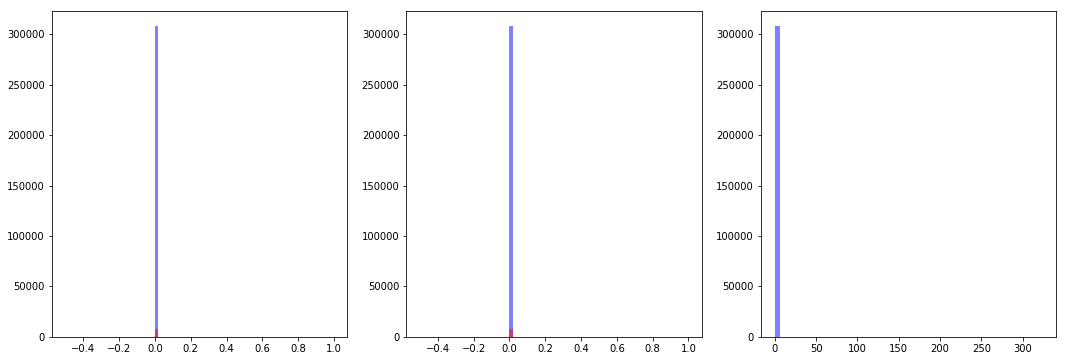

entropy_packets


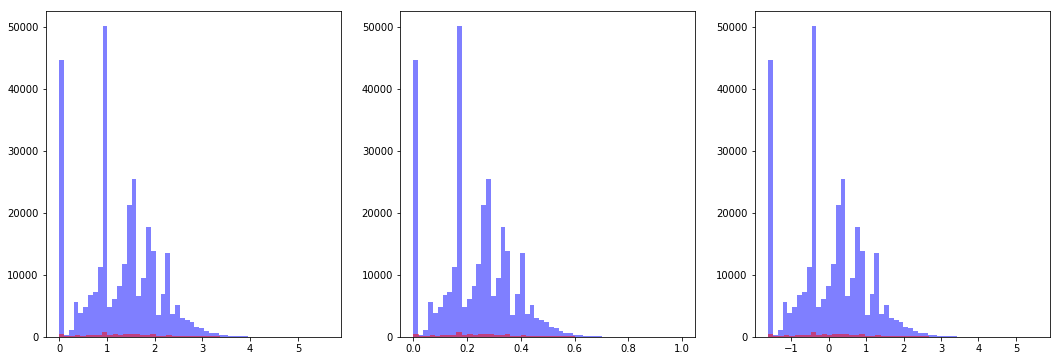

entropy_bytes


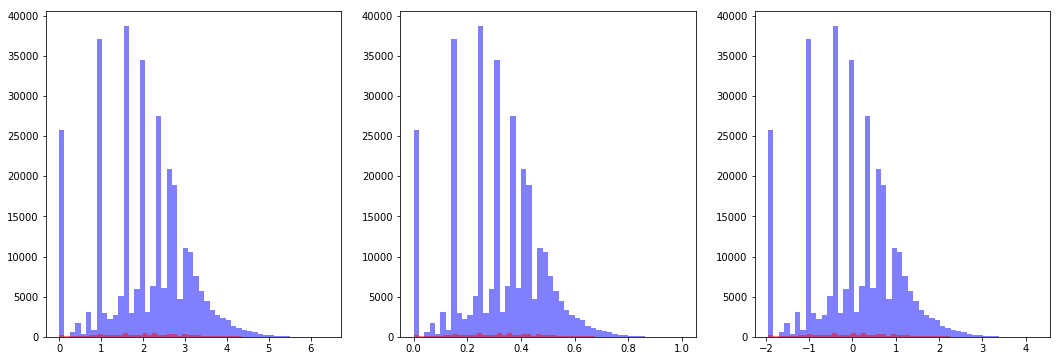

entropy_dst_a_ip


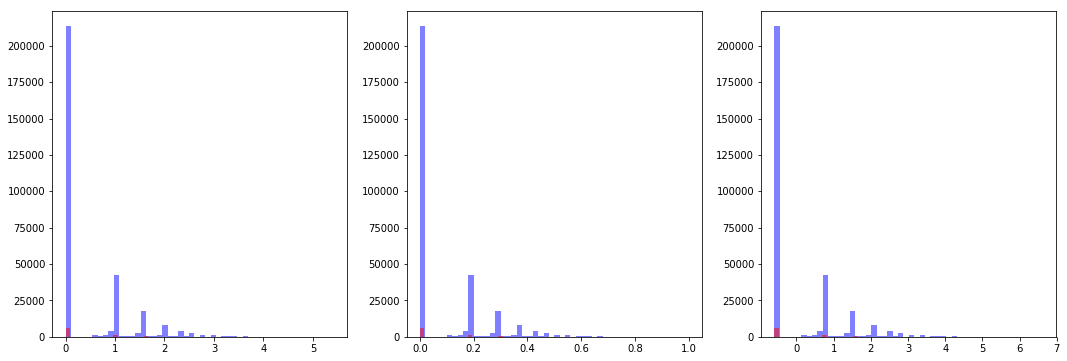

entropy_time


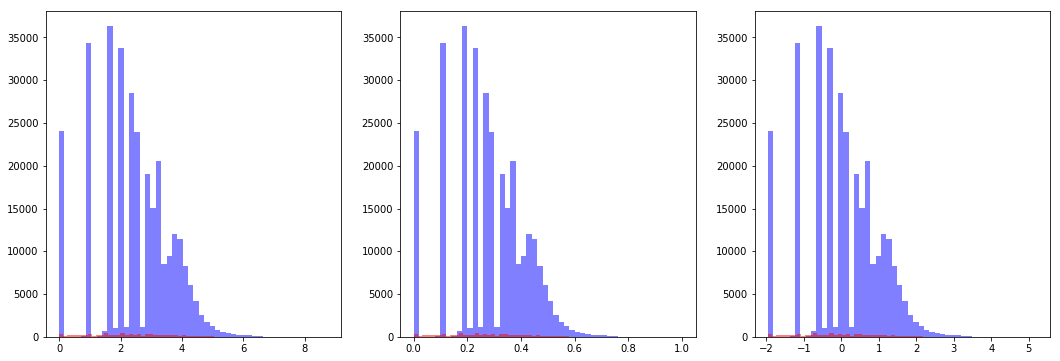

entropy_dports<1024


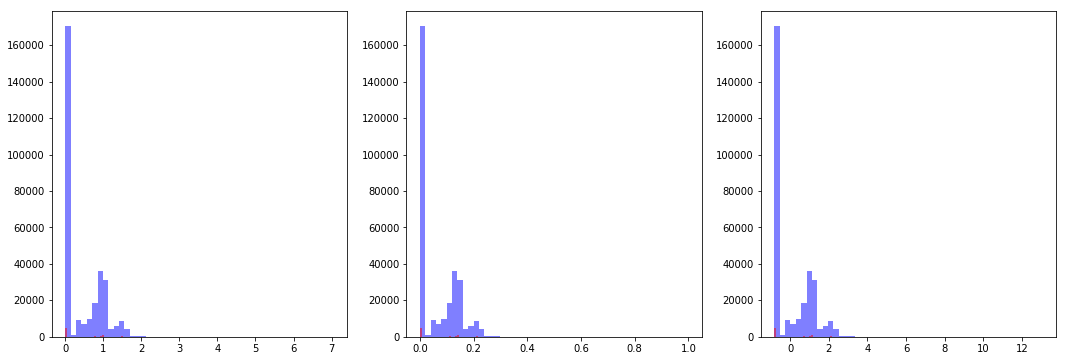

entropy_sports<1024


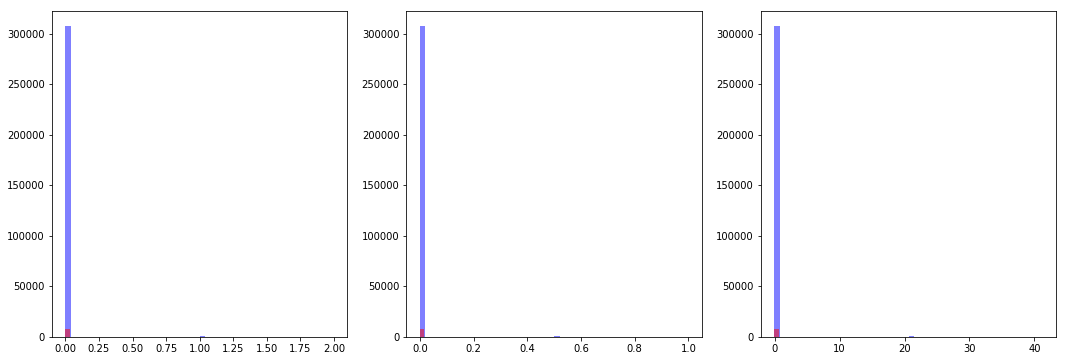

entropy_src_b_ip


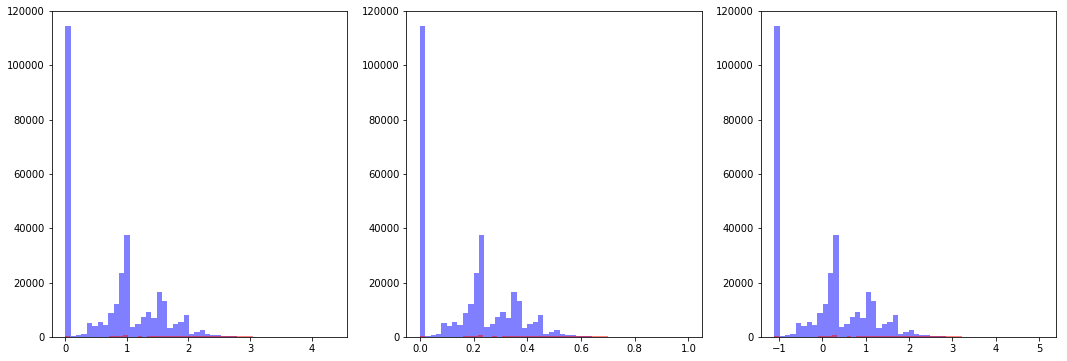

entropy_srcip


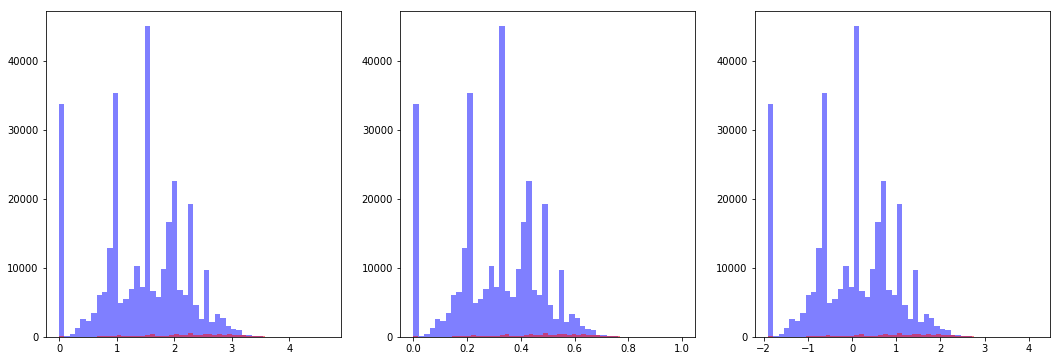

entropy_sports>1024


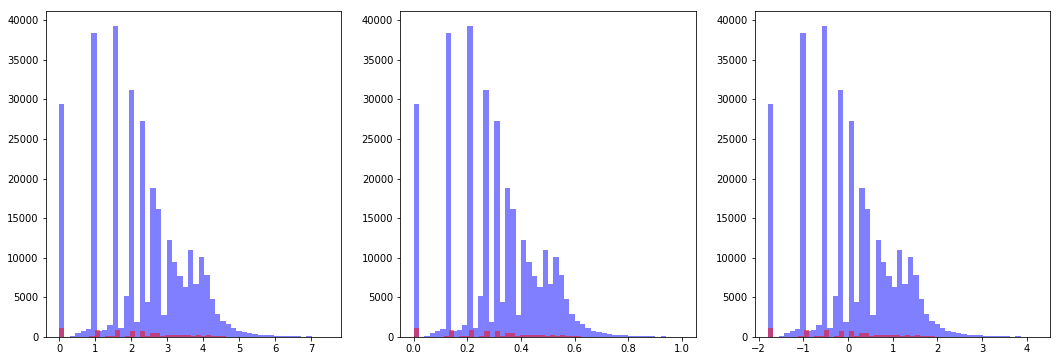

In [9]:
from plot_features import plot_histograms_of_normed, plot_histograms_of_standardized
from summarizer import Summarizer
import matplotlib.pyplot as plt

files = [
    'minute_aggregated/spam_background-0.1s.featureset.csv',
    'minute_aggregated/ddos_background-0.1s.featureset.csv'
]
temp = Summarizer()

features = ['avg_duration'] + list(temp.std_features.keys()) + list(temp.entropy_features.keys())
print('Graphs plotted as: Normal values, normalized values, standardized values')
for filename in files:
    print(filename)
    plot_histograms_of_normed(filename, features)

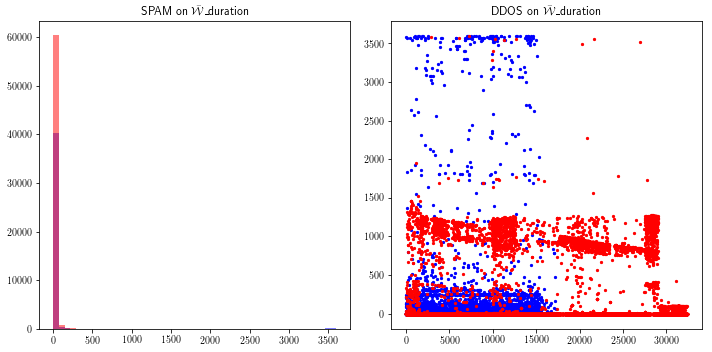

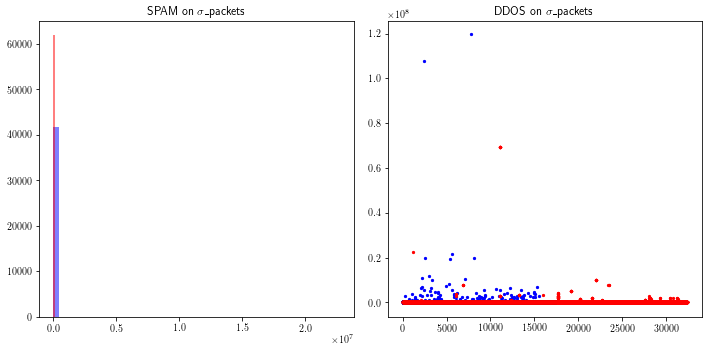

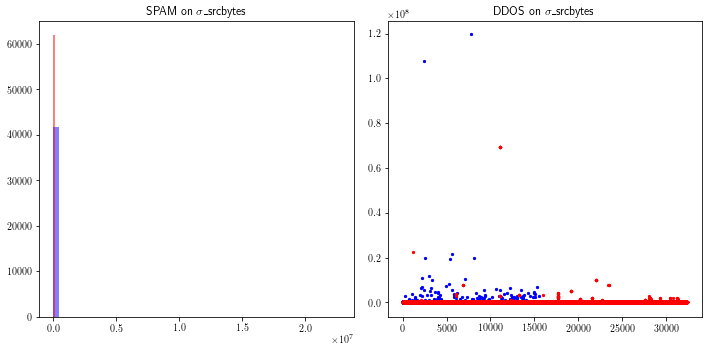

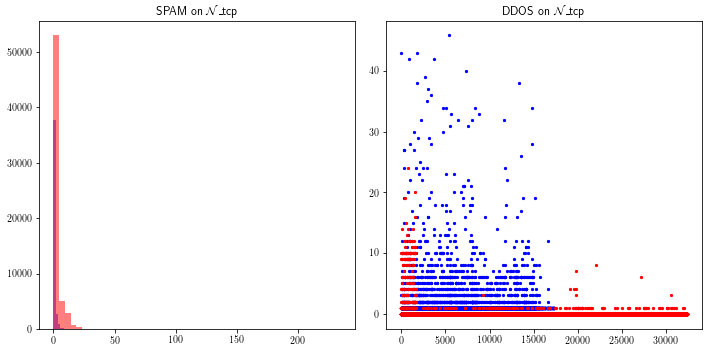

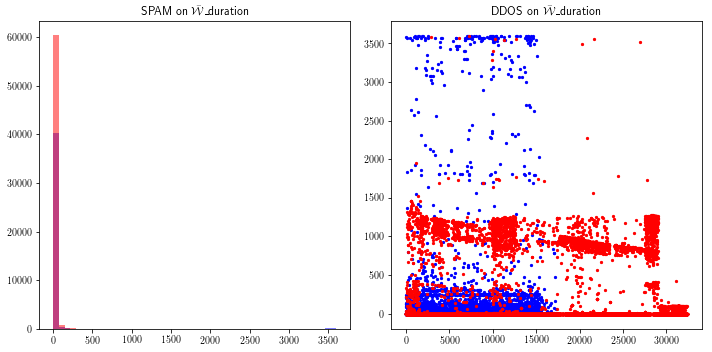

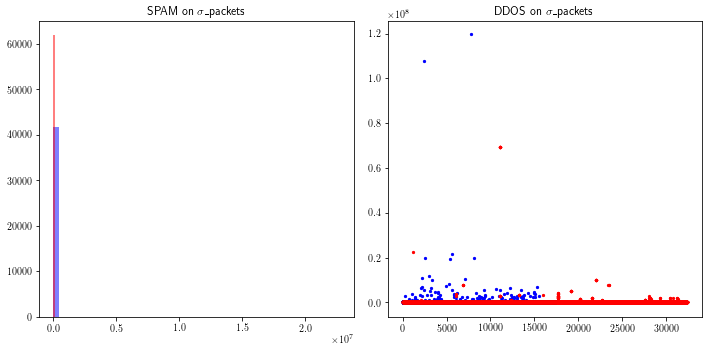

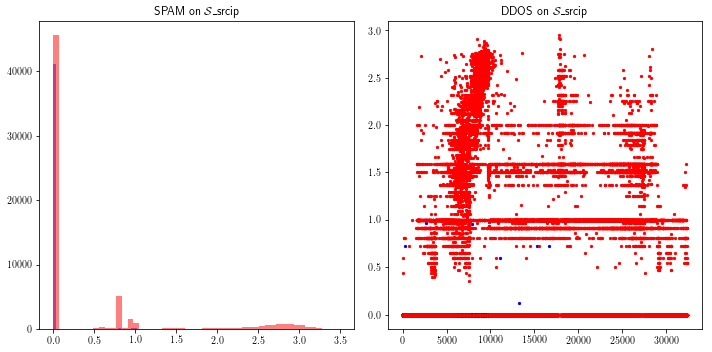

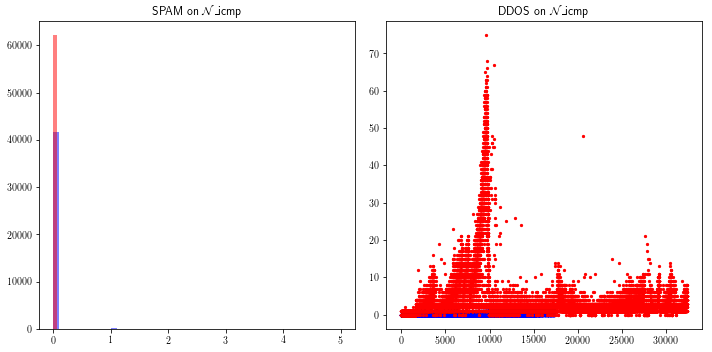

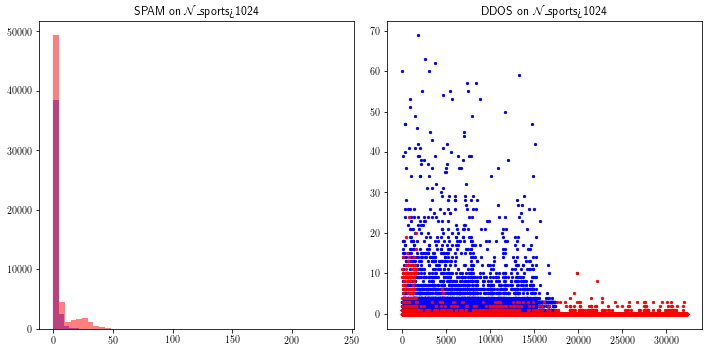

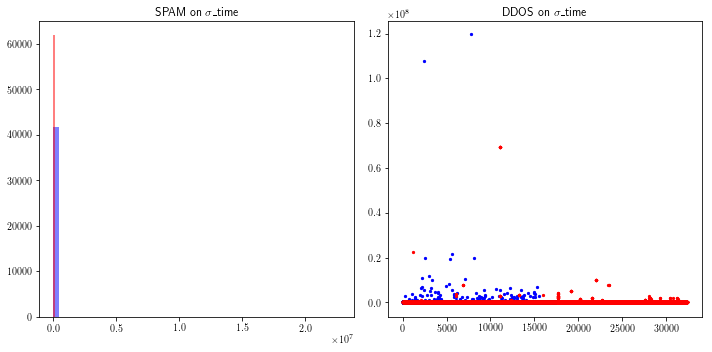

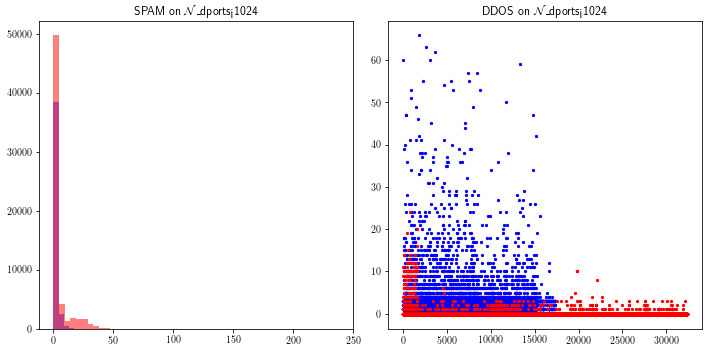

In [8]:
# Compare Histogram with Scatter
# SPAM histograms
from plot_features import plot_histogram_of, plot_scatter_of
from summarizer import Summarizer
import matplotlib.pyplot as plt

files = [
    'minute_aggregated/spam-1s.featureset.csv',
    'minute_aggregated/ddos-0.01s.featureset.csv'
]
features = [
'avg_duration',
'std_packets',
'std_srcbytes',
'n_tcp',
'avg_duration',
'std_packets',
'entropy_srcip',
'n_icmp',
'n_sports>1024',
'std_time',
'n_dports<1024'
    
]
# features = ['src_to_dst', 'std_time', 'std_packets', 'std_srcbytes', 'std_bytes']
# features += sorted(Summarizer().entropy_features.keys())
x = 1
for feature in  features:
    plt.figure(figsize=(10,5))
    plt.subplot(1, 2, 1)
    plot_histogram_of(files[0], feature, save=False)
    plt.subplot(1, 2, 2)
    plot_scatter_of(files[1], feature, save=False)
    plt.tight_layout()
    plt.show()

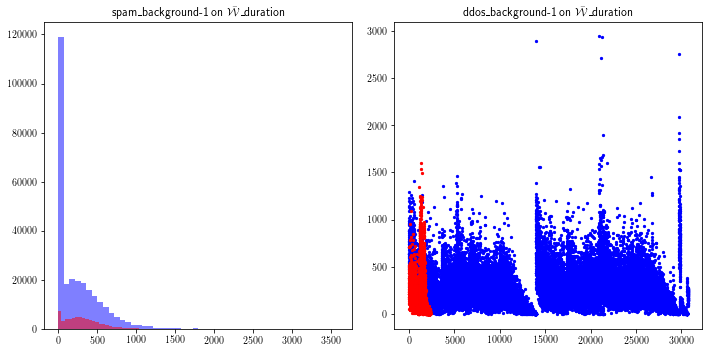

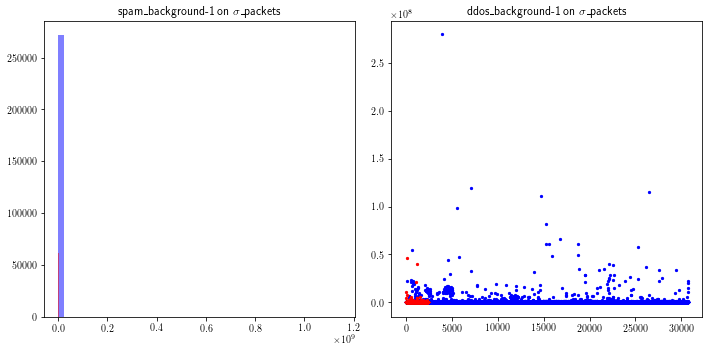

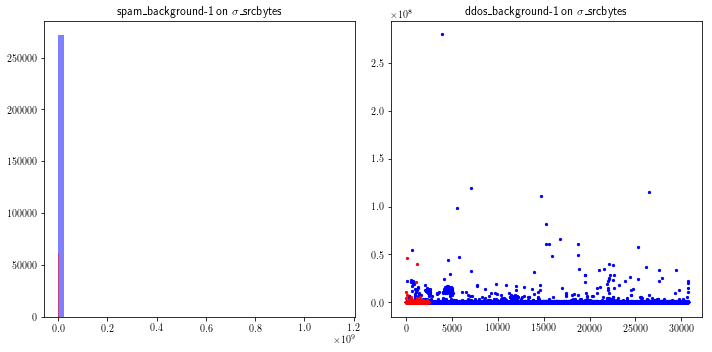

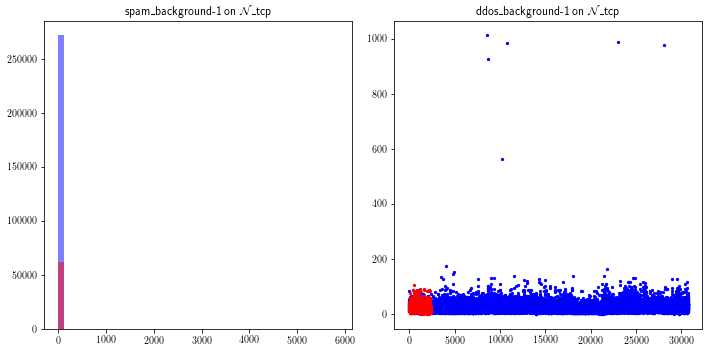

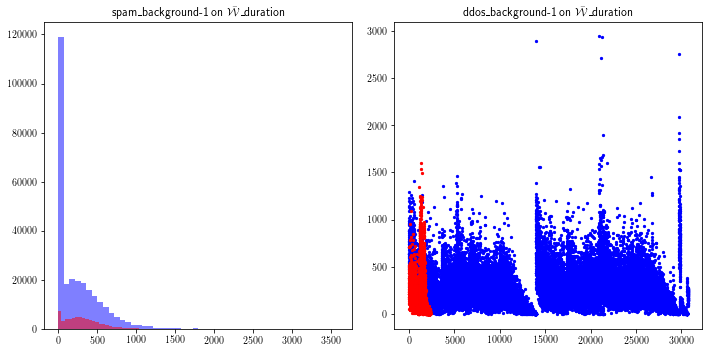

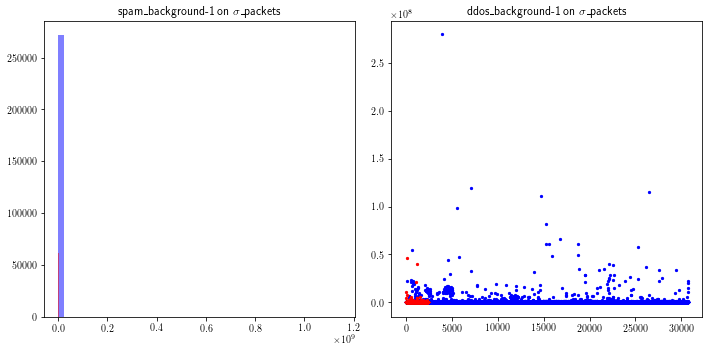

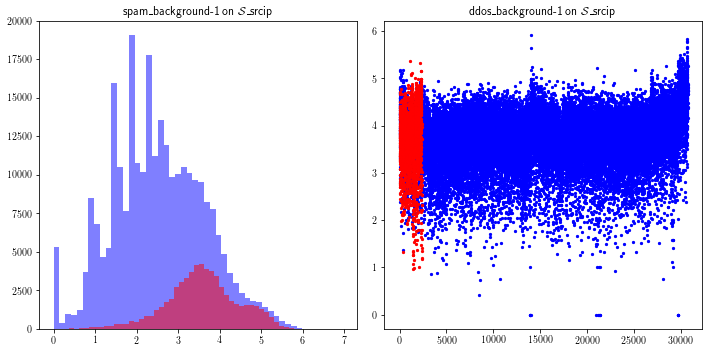

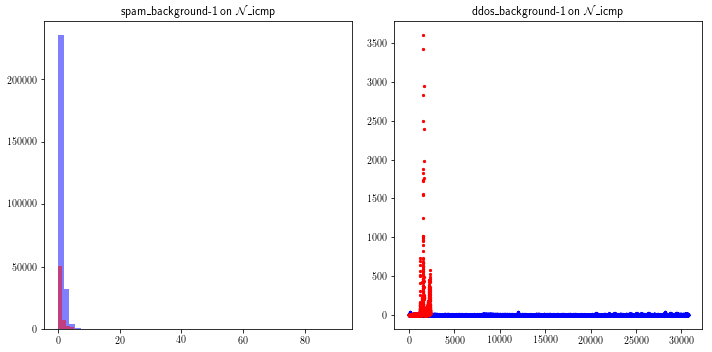

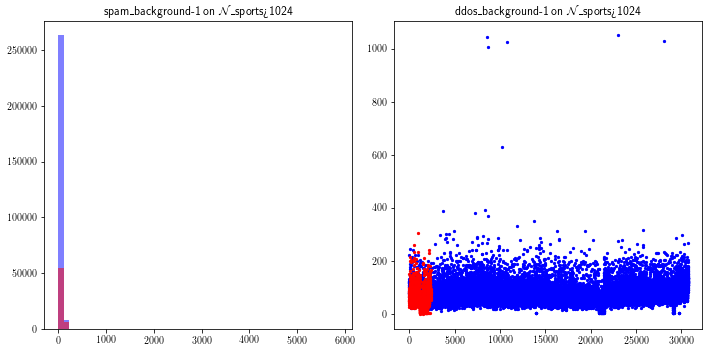

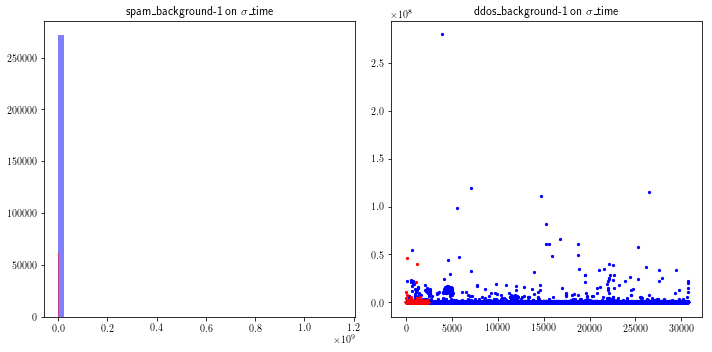

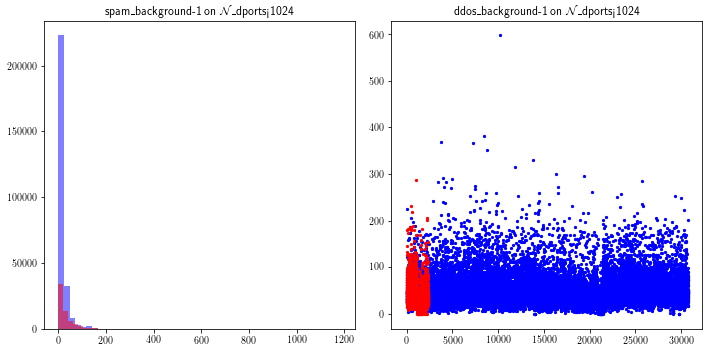

In [5]:
# Compare Histogram with Scatter
# For BACKGROUND
from plot_features import plot_histogram_of, plot_scatter_of
from summarizer import Summarizer
import matplotlib.pyplot as plt

files = [
    'minute_aggregated/spam_background-1.0s.featureset.csv',
    'minute_aggregated/ddos_background-1.0s.featureset.csv'
]
features = [
'avg_duration',
'std_packets',
'std_srcbytes',
'n_tcp',
'avg_duration',
'std_packets',
'entropy_srcip',
'n_icmp',
'n_sports>1024',
'std_time',
'n_dports<1024'
    
]
# features = ['src_to_dst', 'std_time', 'std_packets', 'std_srcbytes', 'std_bytes']
# features += sorted(Summarizer().entropy_features.keys())
x = 1
for feature in  features:
    plt.figure(figsize=(10,5))
    plt.subplot(1, 2, 1)
    plot_histogram_of(files[0], feature, save=False)
    plt.subplot(1, 2, 2)
    plot_scatter_of(files[1], feature, save=False)
    plt.tight_layout()
    plt.show()

# Histogram for SPAM compared to DDOS

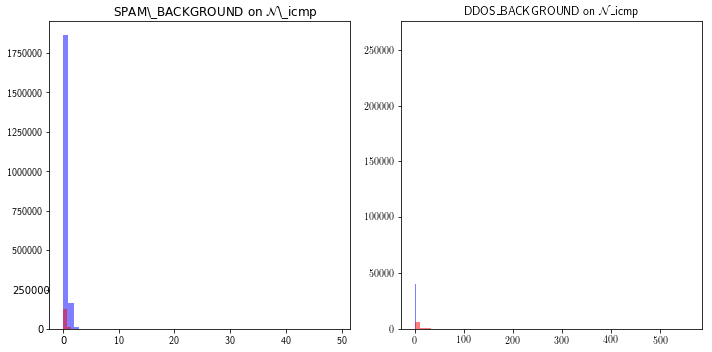

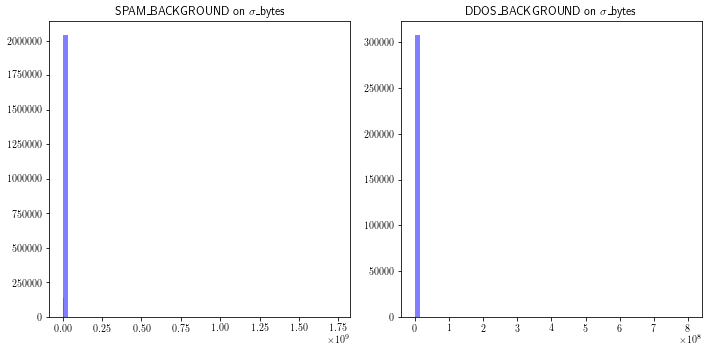

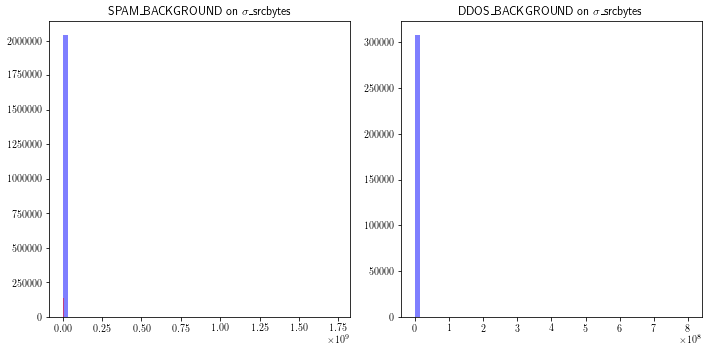

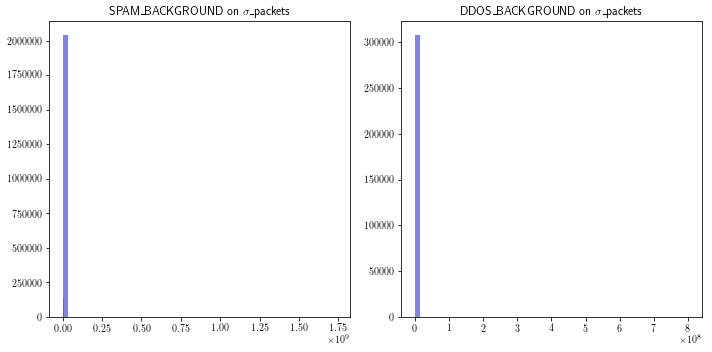

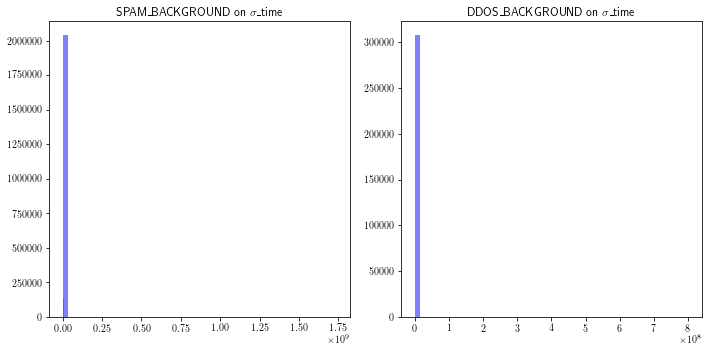

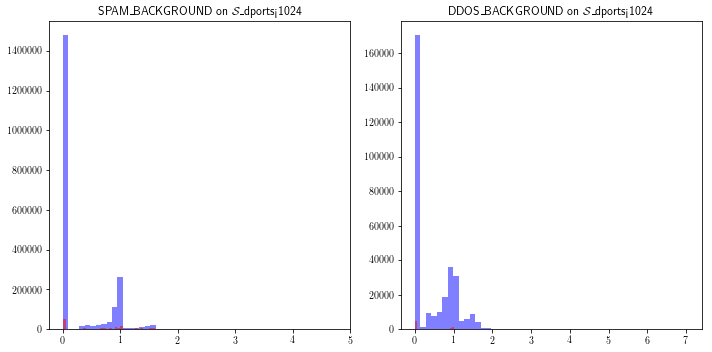

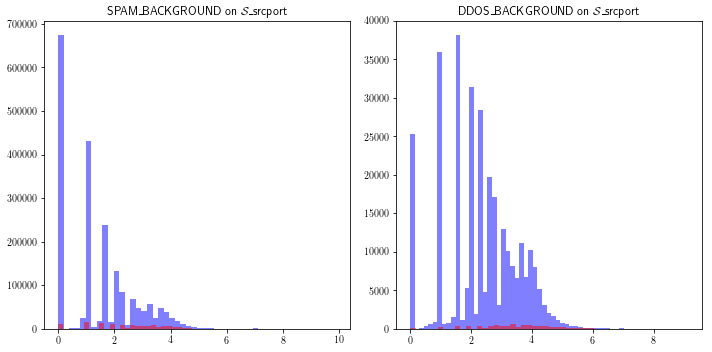

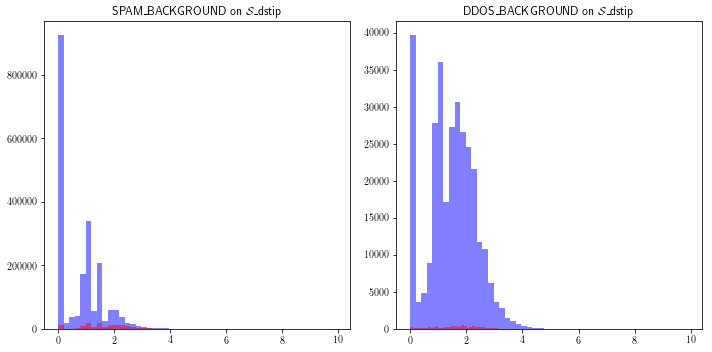

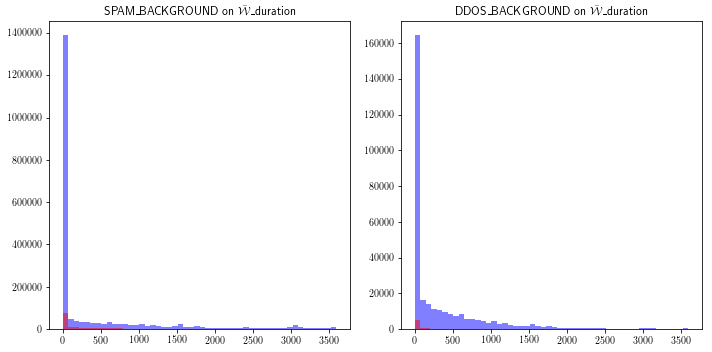

In [1]:
# SPAM histograms
from plot_features import plot_histogram_of
from summarizer import Summarizer
import matplotlib.pyplot as plt

files = [
    'minute_aggregated/spam_background-0.1s.featureset.csv',
    'minute_aggregated/ddos_background-0.1s.featureset.csv',
    'minute_aggregated/irc_background-0.1s.featureset.csv'
]

features = [
    'n_icmp',
    'std_bytes',
'std_srcbytes',
'std_packets',
    'std_time',
'entropy_dports<1024',
'entropy_srcport',
    'entropy_dstip',
'avg_duration',

]
# features = ['src_to_dst', 'std_time', 'std_packets', 'std_srcbytes', 'std_bytes']
# features += sorted(Summarizer().entropy_features.keys())
x = 1
for feature in  features:
    plt.figure(figsize=(10,5))
    plt.subplot(1, 2, 1)
    plot_histogram_of(files[0], feature, save=False)
    plt.subplot(1, 2, 2)
    plot_histogram_of(files[1], feature, save=False)
    plt.tight_layout()
    plt.show()

# Histogram of 1s vs 10s for DDOS

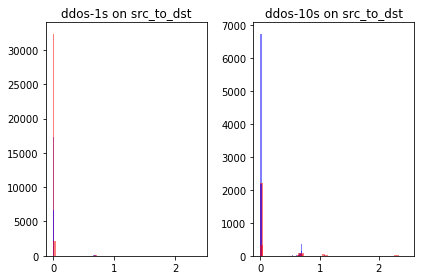

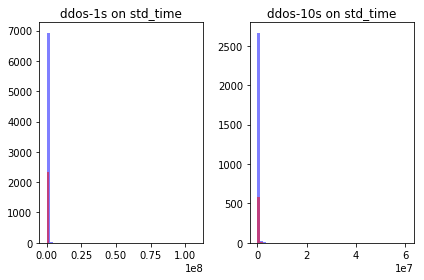

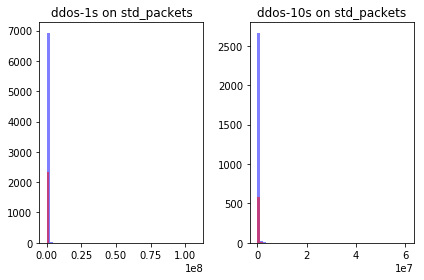

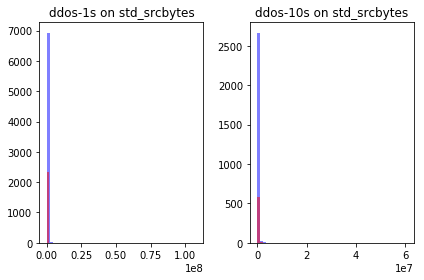

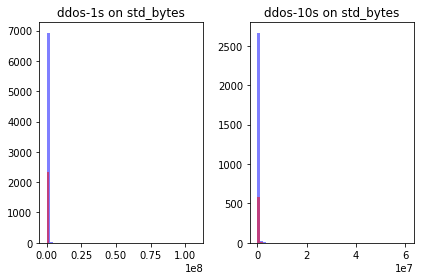

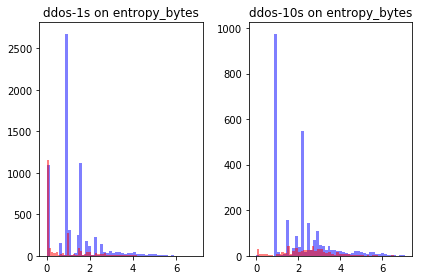

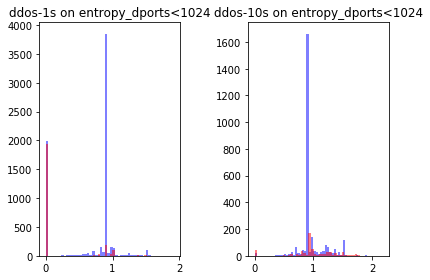

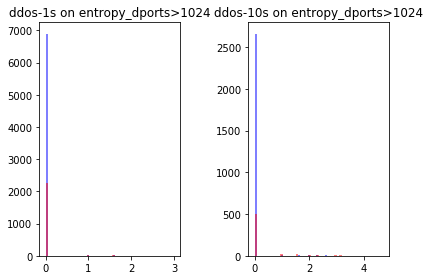

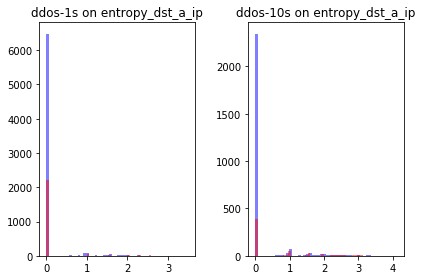

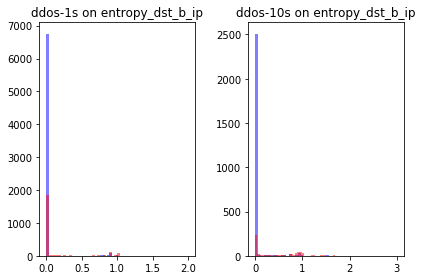

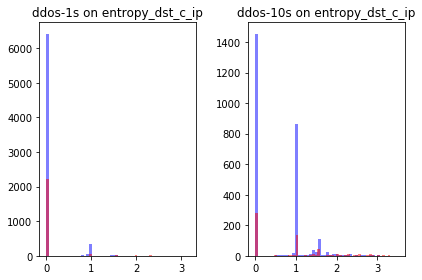

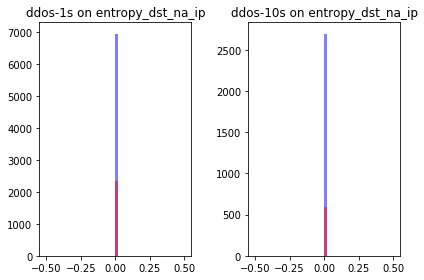

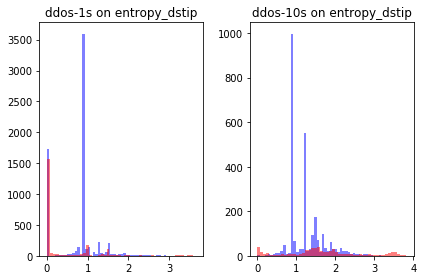

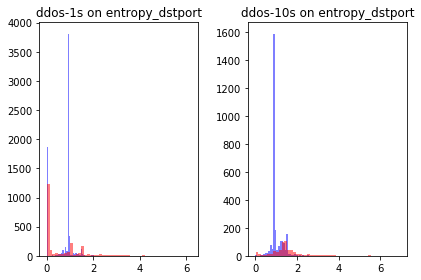

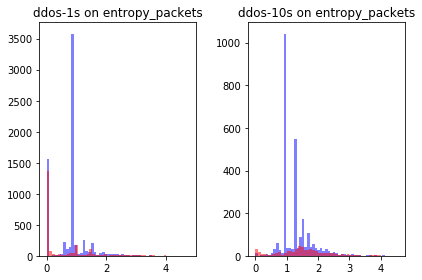

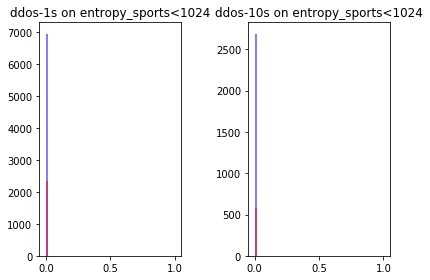

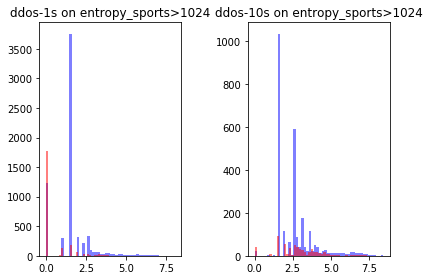

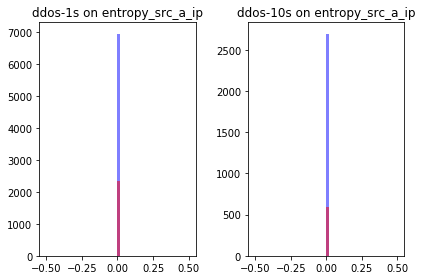

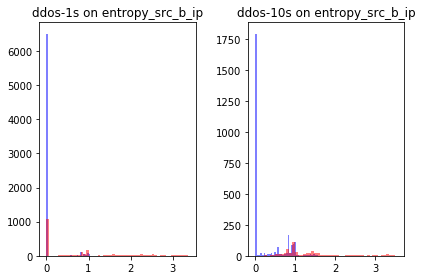

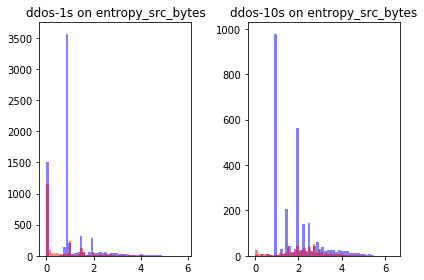

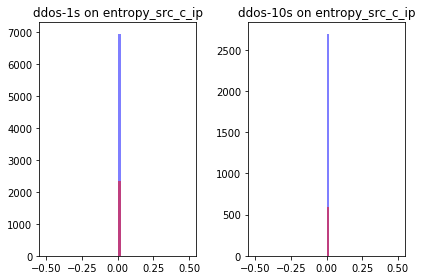

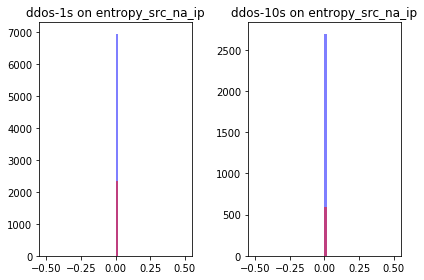

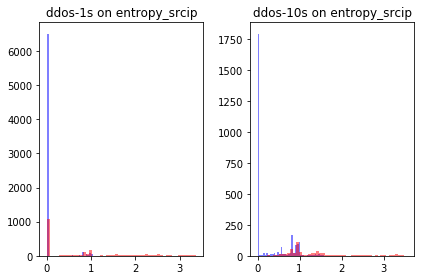

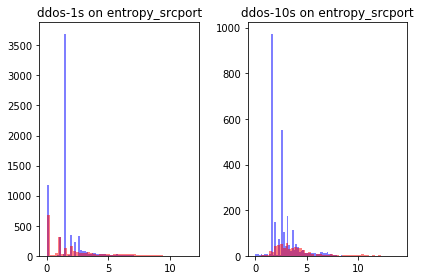

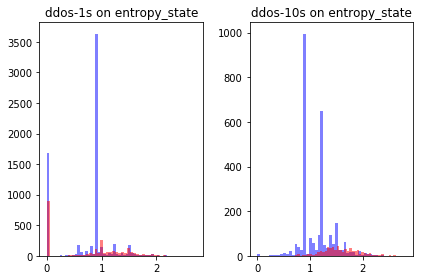

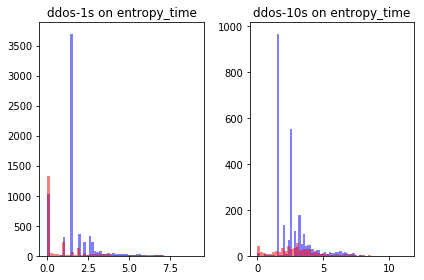

In [7]:
# Histogram of other time intervals
from plot_features import plot_histogram_of
from summarizer import Summarizer
import matplotlib.pyplot as plt

files = [
    'minute_aggregated/ddos-1s.featureset.csv',
    'minute_aggregated/ddos-10s.featureset.csv'
]
features = [
        'src_to_dst',
        'entropy_packets',
        'entropy_src_bytes',
        'entropy_bytes',
        'entropy_time',
        'entropy_dstport',
        'entropy_srcport',
        'entropy_srcip',
        'entropy_dstip',
        'entropy_state',
        'std_bytes',

]
features = ['src_to_dst', 'std_time', 'std_packets', 'std_srcbytes',
           'std_bytes']
features += sorted(Summarizer().entropy_features.keys())
x = 1
for feature in  features:
    plt.subplot(1, 2, 1)
    plot_histogram_of(files[0], feature, save=False)
    plt.subplot(1, 2, 2)
    plot_histogram_of(files[1], feature, save=False)
    plt.tight_layout()
    plt.show()


# 0.01s vs 10s for DDOS

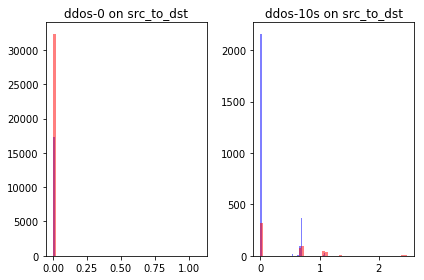

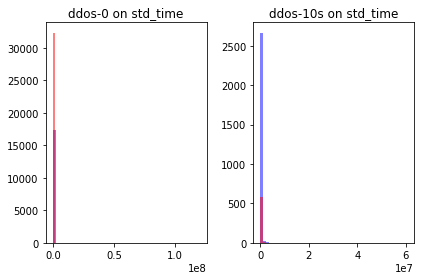

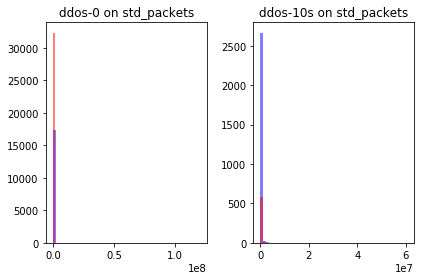

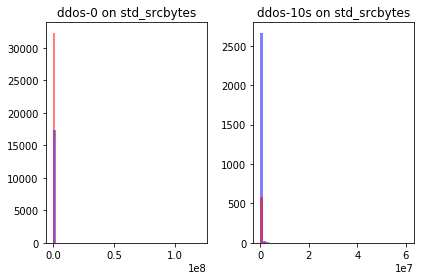

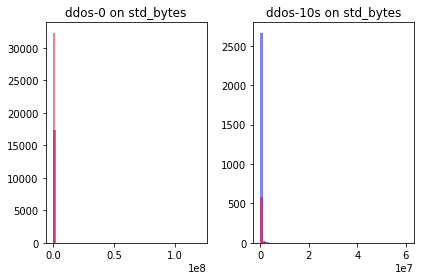

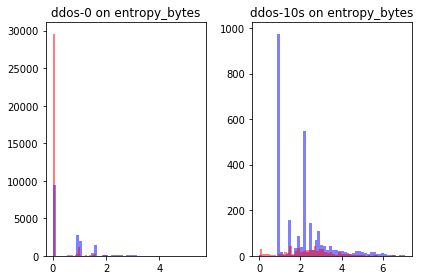

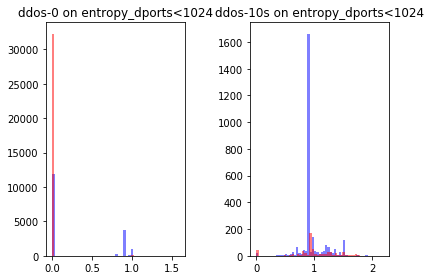

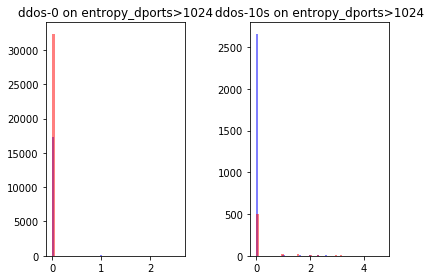

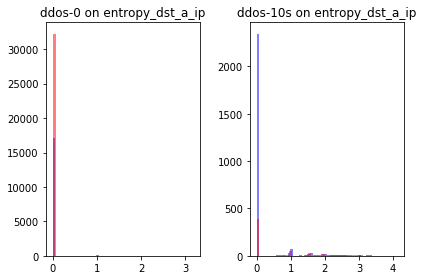

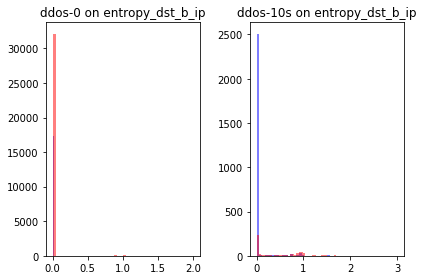

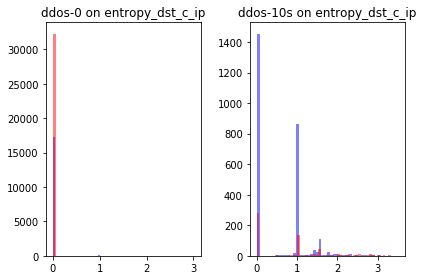

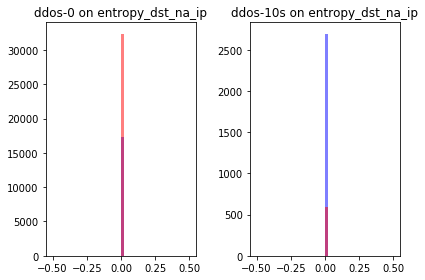

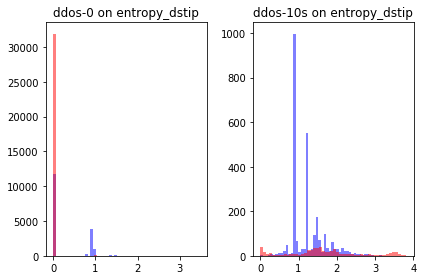

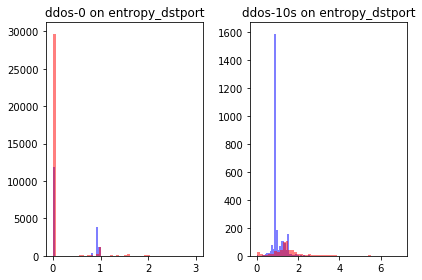

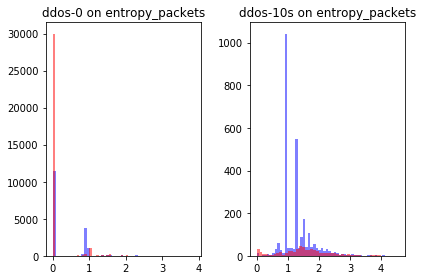

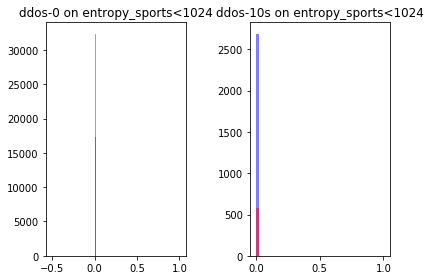

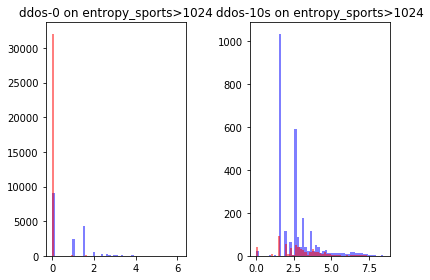

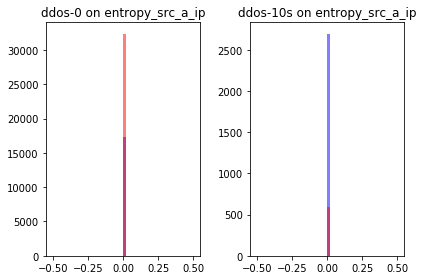

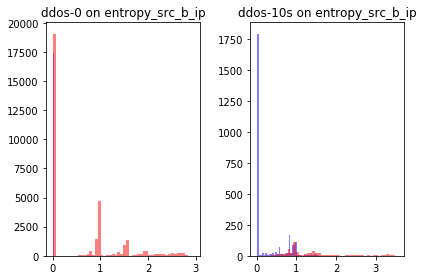

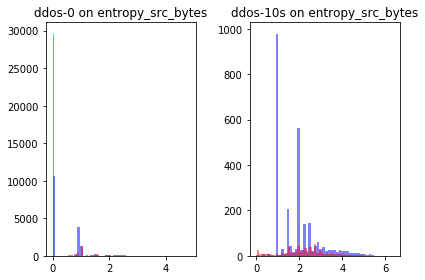

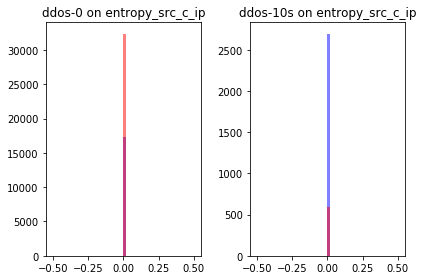

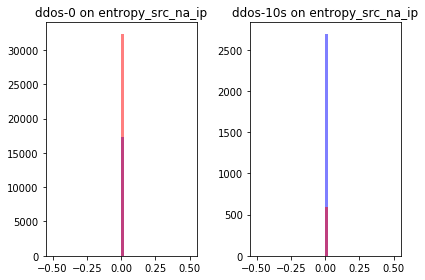

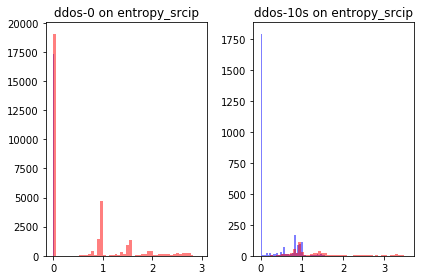

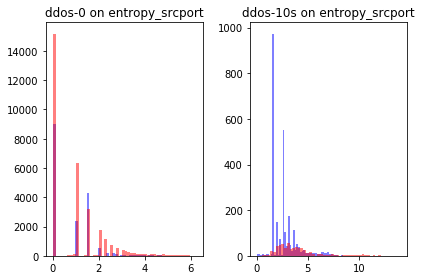

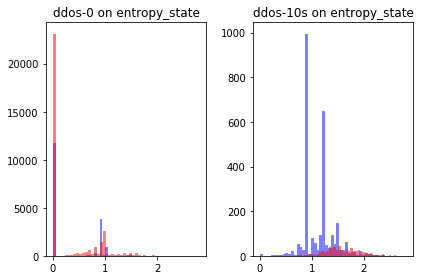

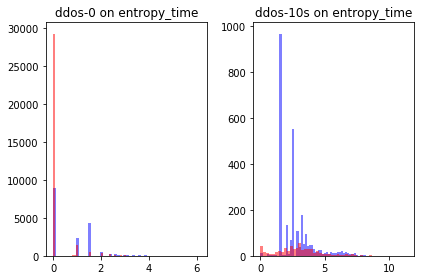

In [8]:
# Histogram of other time intervals
from plot_features import plot_histogram_of
from summarizer import Summarizer
import matplotlib.pyplot as plt

files = [
    'minute_aggregated/ddos-0.01s.featureset.csv',
    'minute_aggregated/ddos-10s.featureset.csv'
]
features = [
        'src_to_dst',
        'entropy_packets',
        'entropy_src_bytes',
        'entropy_bytes',
        'entropy_time',
        'entropy_dstport',
        'entropy_srcport',
        'entropy_srcip',
        'entropy_dstip',
        'entropy_state',
        'std_bytes',

]
features = ['src_to_dst', 'std_time', 'std_packets', 'std_srcbytes',
           'std_bytes']
features += sorted(Summarizer().entropy_features.keys())
x = 1
for feature in  features:
    plt.subplot(1, 2, 1)
    plot_histogram_of(files[0], feature, save=False)
    plt.subplot(1, 2, 2)
    plot_histogram_of(files[1], feature, save=False)
    plt.tight_layout()
    plt.show()


Graphs for minute_aggregated/ddos.featureset.csv


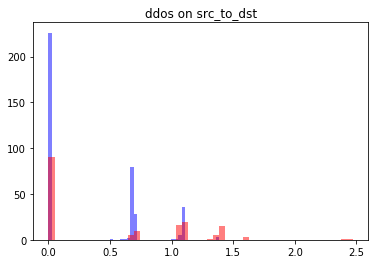

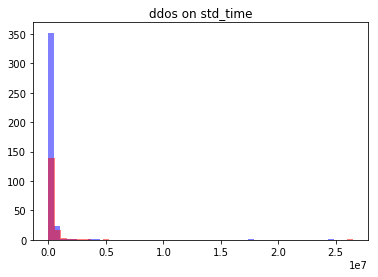

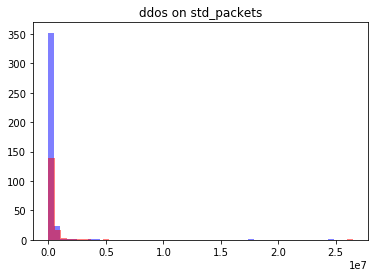

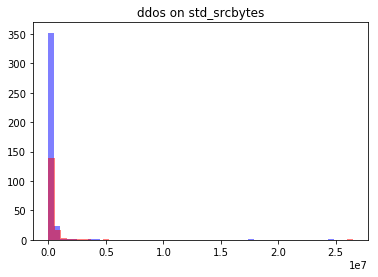

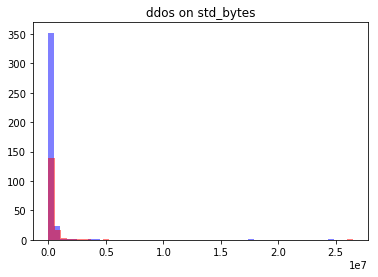

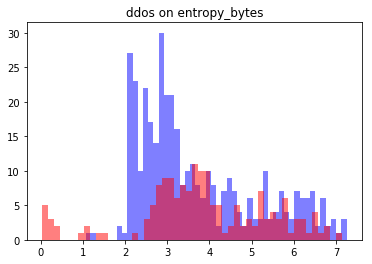

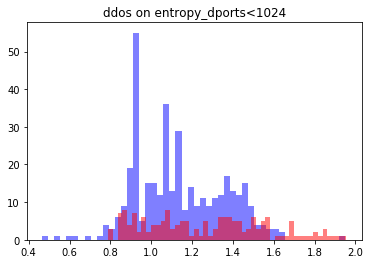

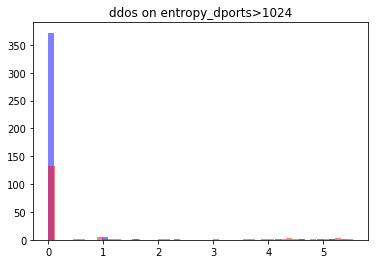

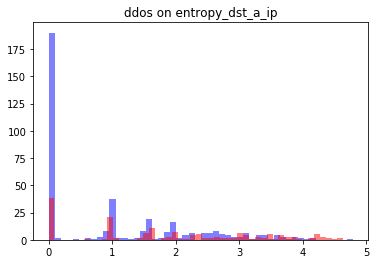

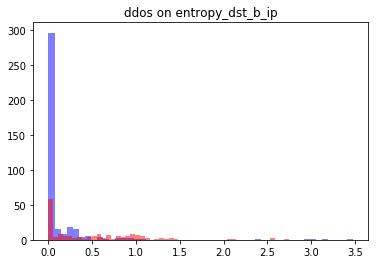

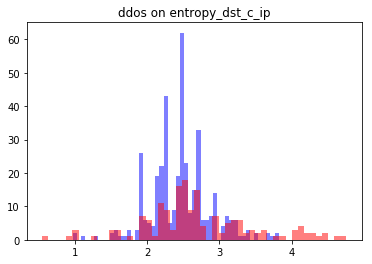

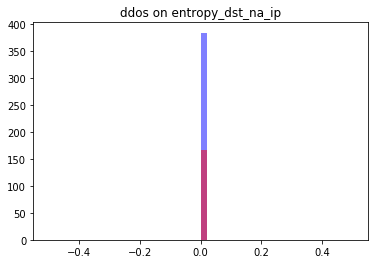

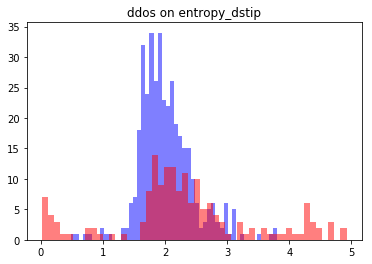

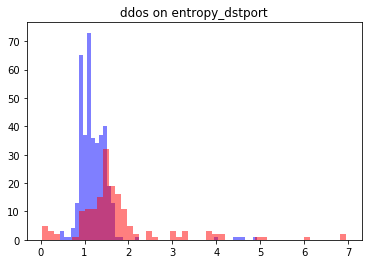

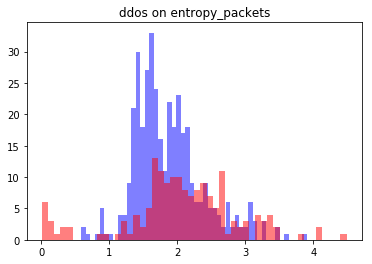

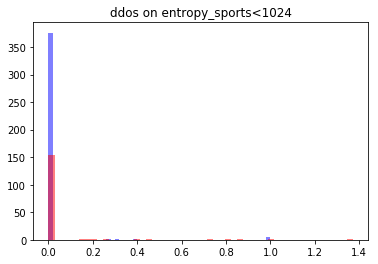

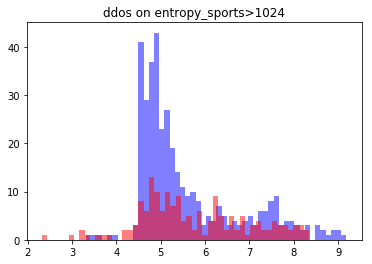

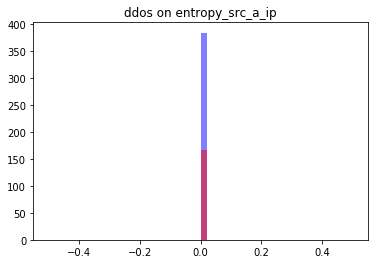

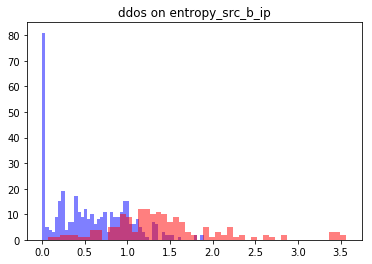

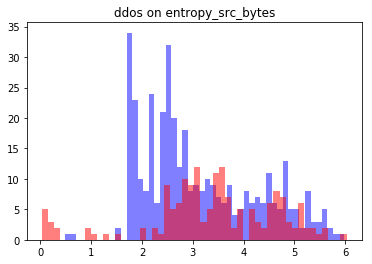

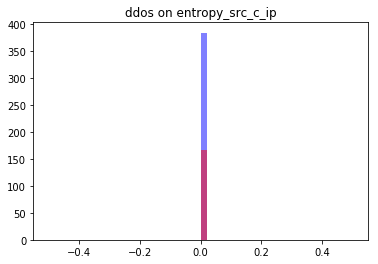

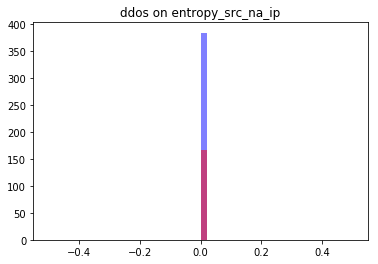

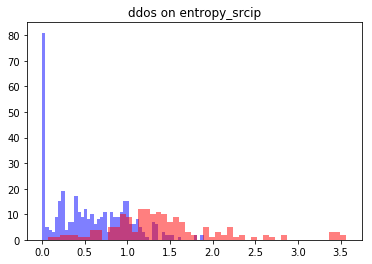

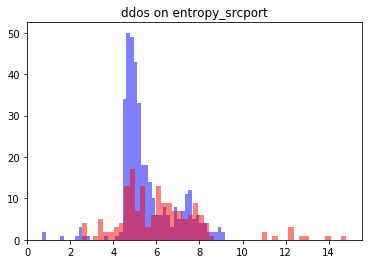

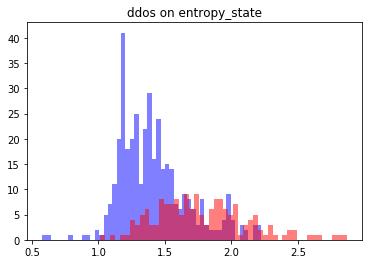

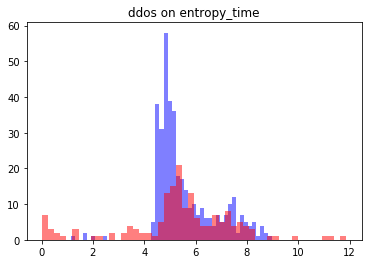

Graphs for minute_aggregated/ddos-2.featureset.csv


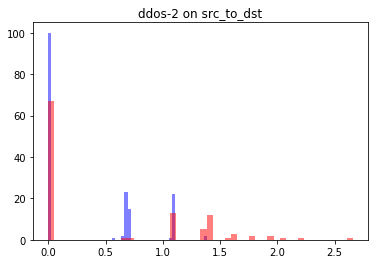

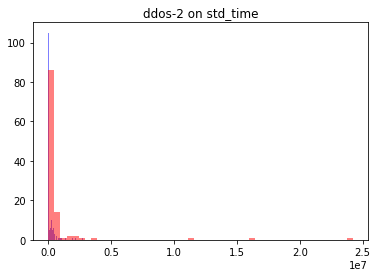

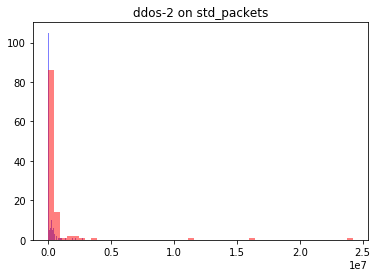

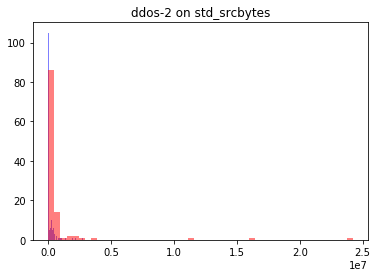

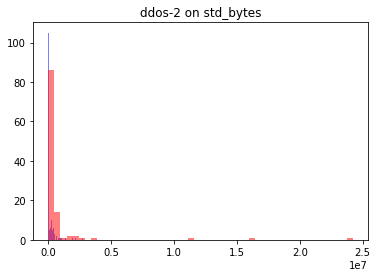

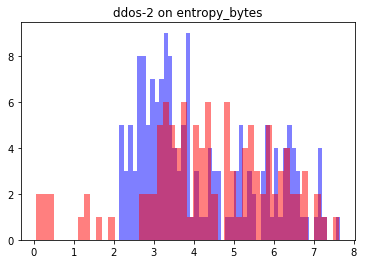

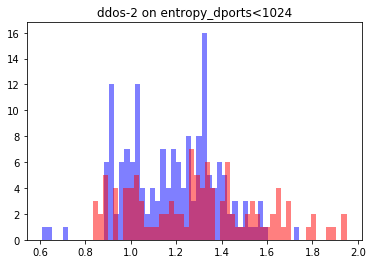

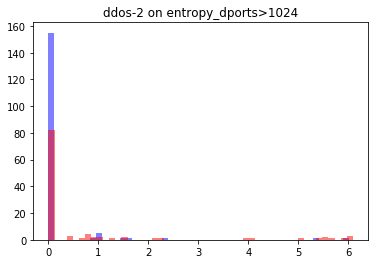

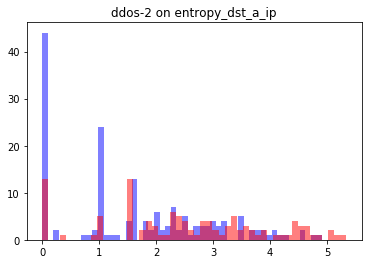

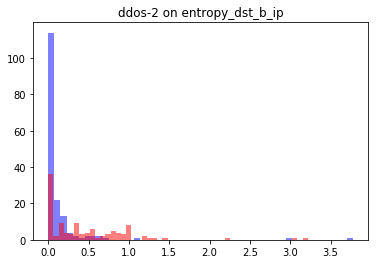

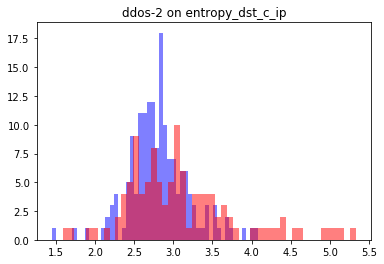

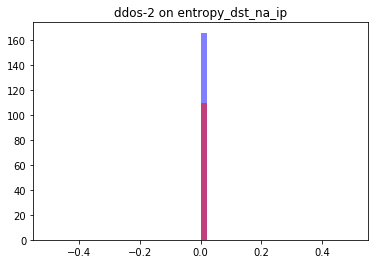

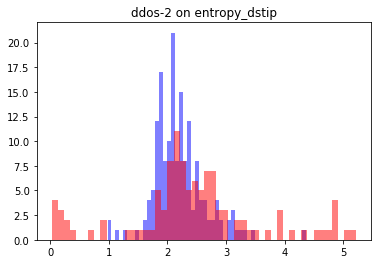

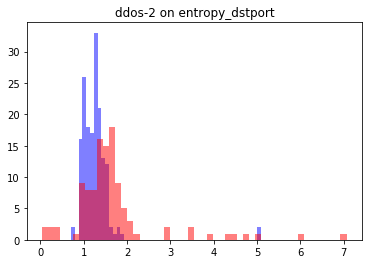

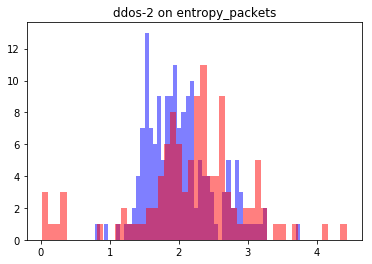

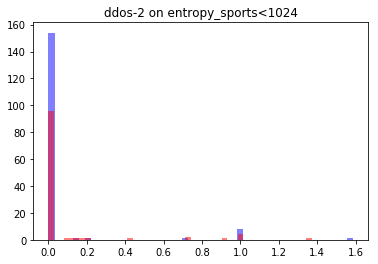

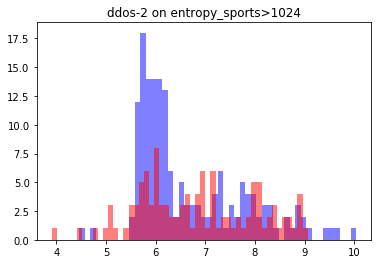

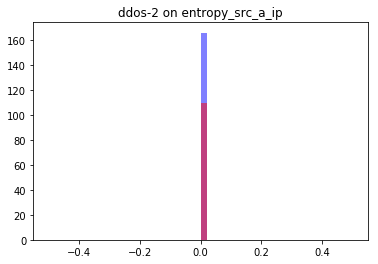

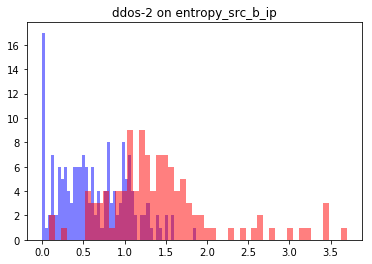

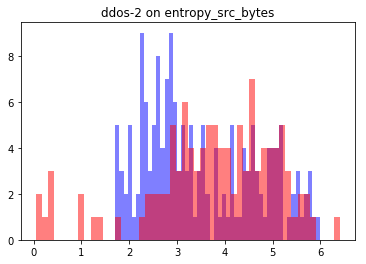

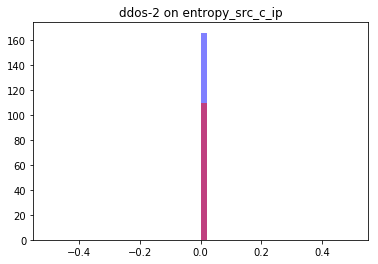

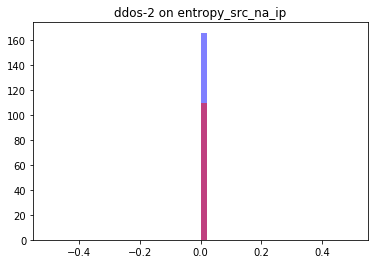

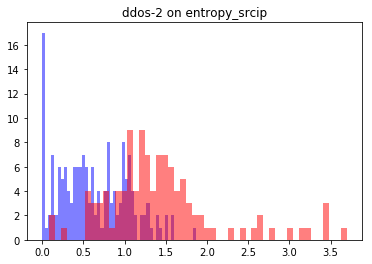

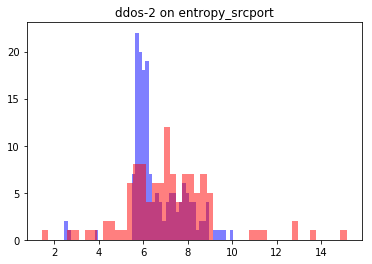

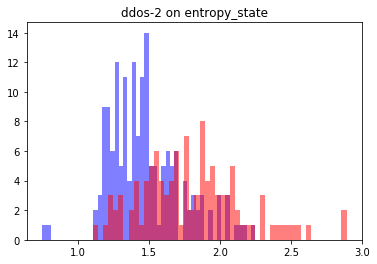

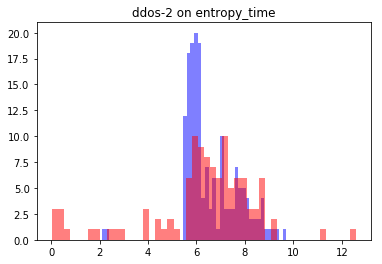

In [3]:
from plot_features import plot_histogram_of
from summarizer import Summarizer

files = [
    'minute_aggregated/ddos.featureset.csv',
    'minute_aggregated/ddos-2.featureset.csv'
]
features = [
        'src_to_dst',
        'entropy_packets',
        'entropy_src_bytes',
        'entropy_bytes',
        'entropy_time',
        'entropy_dstport',
        'entropy_srcport',
        'entropy_srcip',
        'entropy_dstip',
        'entropy_sports>1024',
        'entropy_sports<1024',
        'entropy_dports>1024',
        'entropy_dports<1024',
        'entropy_state',
        'std_bytes',

]
features = ['src_to_dst', 'std_time', 'std_packets', 'std_srcbytes',
           'std_bytes']
features += sorted(Summarizer().entropy_features.keys())

for f in files:
    print('Graphs for {}'.format(f))
    for feature in  features:
        plot_histogram_of(f, feature, save=False)


In [3]:
from botnet_detection import get_specific_features_from, train_and_test_on

filename = 'minute_aggregated/ddos.featureset.csv'
two_minute = 'minute_aggregated/ddos-2.featureset.csv'

best_features = [
        'std_packets',
        'std_bytes',
        'src_to_dst',
        'entropy_packets',
        'entropy_src_b_ip',
        'entropy_bytes',
        'entropy_state',
        'entropy_srcport',
        'entropy_src_bytes',
        'entropy_dst_b_ip',
        'entropy_sports>1024',
        'entropy_dports<1024',
        'entropy_dstport',
        'entropy_dst_c_ip',
        'entropy_dst_a_ip',
        'entropy_srcip',
        'entropy_time',
        'entropy_dstip',
    ]

print("Using Features:")
for feature in best_features:
    print('\t',feature)
    
print('One Minute File')
print('Accuracy: {:.2f}, Precision: {:.2f}, Recall: {:.2f}'.format(
    *train_and_test_on(*get_specific_features_from(
            filename, best_features))))

print('\nTwo Minute file')

print('Accuracy: {:.2f}, Precision: {:.2f}, Recall: {:.2f}'.format(
    *train_and_test_on(*get_specific_features_from(
            two_minute, best_features))))

print('\nTen second interval file')
print('Accuracy: {:.2f}, Precision: {:.2f}, Recall: {:.2f}'.format(
    *train_and_test_on(*get_specific_features_from(
            'minute_aggregated/ddos-10s.featureset.csv', best_features))))


Using Features:
	 std_packets
	 std_bytes
	 src_to_dst
	 entropy_packets
	 entropy_src_b_ip
	 entropy_bytes
	 entropy_state
	 entropy_srcport
	 entropy_src_bytes
	 entropy_dst_b_ip
	 entropy_sports>1024
	 entropy_dports<1024
	 entropy_dstport
	 entropy_dst_c_ip
	 entropy_dst_a_ip
	 entropy_srcip
	 entropy_time
	 entropy_dstip
One Minute File
Accuracy: 0.82, Precision: 0.69, Recall: 0.77

Two Minute file
Accuracy: 0.83, Precision: 0.69, Recall: 0.89

Ten second interval file
Accuracy: 0.97, Precision: 0.88, Recall: 0.93
